# **EXPLORATORY DATA ANALYSIS - AIRBNB DATA**

### Student Name: Ravivarman Devarajan
### Student ID: S2362970
### Date: 5-12-2024



<div style="text-align: justify;">

## **ABSTRACT**
This report provides a comprehensive exploratory data analysis (EDA) of an Airbnb dataset from Cape Town, South Africa. The primary goal was to clean, convert and analyze the data in order to discover significant insights and generate research questions about the dynamics of Airbnb listings in the region. Data cleaning procedures included handling missing values, standardizing variable forms and deleting duplicates to assure data integrity. Key factors, such as pricing, availability and review scores were investigated using statistial summaries and visualizations to discover patterns, trends and potential outliers. The analysis focuses on the relationships between listing attributes, pricing and user feedback, providing insights into market trends and customer preferences. Three research questions were designed to delve deeper into these relationships and give stakeholders with practical findings. The findings underscore the importance of robust data preparation and visualization in understanding complex datasets.
</div>


##**INTRODUCTION**
<div style="text-align: justify;">
Airbnb, a key platform in sharing economy, has transformed how accommodations are rented and booked. This paper analyzes a dataset from Cape Town, South Africa, given by Inside Airbnb. This report uses data cleaning and exploratory data nalysis approaches to prepare the data for useful insights and find patterns related to listings, price and customer behavior. The data will serve as a foundation for answering important questions about the Cape Town Airbnb sector.
</div>

##**Step 1: Reading and Understanding the Data**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # plt is alias for matplotlib
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')
data1 = pd.read_csv('/content/drive/MyDrive/data/Airbnb/airbnb_1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/data/Airbnb/airbnb_2.csv')
data = pd.merge(data1, data2, how='outer') #merging both the datasets

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data.head() #returns first few rows

id                         listing_url     scrape_id last_scraped  \
0   3191.0   https://www.airbnb.com/rooms/3191  2.024060e+13   29/06/2024   
1  15007.0  https://www.airbnb.com/rooms/15007  2.024060e+13   29/06/2024   
2  15068.0  https://www.airbnb.com/rooms/15068  2.024060e+13   29/06/2024   
3  15077.0  https://www.airbnb.com/rooms/15077  2.024060e+13   29/06/2024   
4  15199.0  https://www.airbnb.com/rooms/15199  2.024060e+13   30/06/2024   

        source                                  name  \
0  city scrape               Malleson Garden Cottage   
1  city scrape  Blaauwberg House (now with inverter)   
2  city scrape                            Grande Bay   
3  city scrape     Top relaxed beach living in style   
4  city scrape               Self catering apartment   

                                         description  \
0  This is a lovely, separate, self-catering cott...   
1  Welcome to our self-catering beach-front famil...   
2  Modern spacious apartment.  Three bedrooms two...   
3  Situated either on the ground floor with direc...   
4                                                NaN   

                               neighborhood_overview  \
0  Mowbray is on the Southern Suburbs line, 6km (...   
1  Bloubergstrand is a lovely, cosy suburb near C...   
2  Close to Eden on The Bay and lots of restauran...   
3  It is probably the best hub in order to explor...   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/697022/385407...     3754  ...   
1  https://a0.muscache.com/pictures/3b654aa4-248e...    59072  ...   
2  https://a0.muscache.com/pictures/a09b3f0d-d43b...    59318  ...   
3  https://a0.muscache.com/pictures/4a8fceaa-655e...    59342  ...   
4  https://a0.muscache.com/pictures/142776/5b6c9e...    59694  ...   

  first_review last_review review_scores_rating review_scores_accuracy  \
0   31/05/2013  18/06/2024                 4.82                   4.84   
1   15/12/2013  02/04/2024                 4.83                   4.91   
2          NaN         NaN                  NaN                    NaN   
3   06/01/2013  16/06/2022                 5.00                   4.86   
4   04/03/2014  15/04/2016                 4.50                   4.00   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                      4.70                  4.97                        4.96   
1                      4.85                  4.98                        4.96   
2                       NaN                   NaN                         NaN   
3                      4.86                  4.86                        4.71   
4                      4.00                  4.50                        5.00   

  review_scores_location review_scores_value reviews_per_month  
0                   4.77                4.81              0.59  
1                   4.93                4.85              0.36  
2                    NaN                 NaN               NaN  
3                   4.86                5.00              0.05  
4                   5.00                4.00              0.02  

[5 rows x 75 columns]

<div style="page-break-after: always;"></div>

In [3]:
data.shape #returns the number of rows and columns

(23564, 75)

In [4]:
data.columns #returns the column names

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
# Display the summary information of the DataFrame, including the number of non-null entries,
# data types of each column, and memory usage. This helps to quickly understand the structure
# and completeness of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23564 non-null  float64
 1   listing_url                                   23564 non-null  object 
 2   scrape_id                                     23564 non-null  float64
 3   last_scraped                                  23564 non-null  object 
 4   source                                        23564 non-null  object 
 5   name                                          23563 non-null  object 
 6   description                                   23161 non-null  object 
 7   neighborhood_overview                         13906 non-null  object 
 8   picture_url                                   23564 non-null  object 
 9   host_id                                       23564 non-null 

In [6]:
# Generate summary statistics for the dataset and transpose the result for easier interpretation
# This provides key statistics such as mean, standard deviation, min, and max for each numerical column
data.describe().transpose()


count          mean  \
id                                            23564.0  4.578648e+17   
scrape_id                                     23564.0  2.024060e+13   
host_id                                       23564.0  1.863474e+08   
host_listings_count                           23564.0  1.405975e+01   
host_total_listings_count                     23564.0  2.014543e+01   
neighbourhood_group_cleansed                      0.0           NaN   
latitude                                      23564.0 -3.395700e+01   
longitude                                     23564.0  1.847272e+01   
accommodates                                  23564.0  3.779240e+00   
bathrooms                                     20215.0  1.729211e+00   
bedrooms                                      22986.0  1.903202e+00   
beds                                          20203.0  2.161461e+00   
minimum_nights                                23564.0  4.430317e+00   
maximum_nights                                23564.0  9.290918e+02   
minimum_minimum_nights                        23536.0  4.014276e+00   
maximum_minimum_nights                        23536.0  5.546015e+00   
minimum_maximum_nights                        23536.0  1.061742e+03   
maximum_maximum_nights                        23536.0  1.074686e+03   
minimum_nights_avg_ntm                        23536.0  4.472085e+00   
maximum_nights_avg_ntm                        23536.0  1.068637e+03   
calendar_updated                                  0.0           NaN   
availability_30                               23564.0  1.537099e+01   
availability_60                               23564.0  3.387460e+01   
availability_90                               23564.0  5.336123e+01   
availability_365                              23564.0  1.991968e+02   
calculated_host_listings_count                23564.0  1.195654e+01   
calculated_host_listings_count_entire_homes   23564.0  1.094483e+01   
calculated_host_listings_count_private_rooms  23564.0  9.471652e-01   
calculated_host_listings_count_shared_rooms   23564.0  1.510779e-02   
number_of_reviews                             23564.0  2.378365e+01   
number_of_reviews_ltm                         23564.0  6.486547e+00   
number_of_reviews_l30d                        23564.0  2.839925e-01   
review_scores_rating                          18456.0  4.784594e+00   
review_scores_accuracy                        18452.0  4.781196e+00   
review_scores_cleanliness                     18452.0  4.767311e+00   
review_scores_checkin                         18449.0  4.820365e+00   
review_scores_communication                   18451.0  4.825068e+00   
review_scores_location                        18450.0  4.807350e+00   
review_scores_value                           18449.0  4.714326e+00   
reviews_per_month                             18456.0  8.917680e-01   

                                                       std           min  \
id                                            4.736383e+17  3.191000e+03   
scrape_id                                     0.000000e+00  2.024060e+13   
host_id                                       1.810619e+08  3.754000e+03   
host_listings_count                           3.426714e+01  0.000000e+00   
host_total_listings_count                     7.287013e+01  0.000000e+00   
neighbourhood_group_cleansed                           NaN           NaN   
latitude                                      9.937676e-02 -3.426284e+01   
longitude                                     1.251539e-01  1.832020e+01   
accommodates                                  2.423113e+00  1.000000e+00   
bathrooms                                     1.280726e+00  0.000000e+00   
bedrooms                                      1.501556e+00  0.000000e+00   
beds                                          1.915285e+00  0.000000e+00   
minimum_nights                                1.677151e+01  1.000000e+00   
maximum_nights                                6.514242e+04  1.000000e+00

# **Step2: Data Cleaning and Wrangling**

In [7]:
#selecting the variables of interest
selected_df = data[['price','room_type','property_type','accommodates','number_of_reviews','review_scores_rating','neighbourhood_cleansed','bedrooms','bathrooms','availability_365','availability_30','availability_60','availability_90','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_value','review_scores_checkin','host_is_superhost']]
selected_df.head()

price        room_type                property_type  accommodates  \
0    $635.00  Entire home/apt                  Entire home             2   
1  $3,102.00  Entire home/apt                  Entire home             6   
2  $2,000.00  Entire home/apt           Entire rental unit             6   
3  $1,070.00     Private room  Private room in rental unit             2   
4  $2,500.00  Entire home/apt           Entire rental unit             2   

   number_of_reviews  review_scores_rating neighbourhood_cleansed  bedrooms  \
0                 79                  4.82                Ward 57       1.0   
1                 46                  4.83                Ward 23       3.0   
2                  0                   NaN                Ward 23       3.0   
3                  7                  5.00                 Ward 4       1.0   
4                  2                  4.50               Ward 115       1.0   

   bathrooms  availability_365  availability_30  availability_60  \
0        1.0               305                0                0   
1        3.0               147               27               51   
2        2.0               351               29               59   
3        1.5               205                8               11   
4        1.0               365               30               60   

   availability_90  review_scores_cleanliness  review_scores_communication  \
0               30                       4.70                         4.96   
1               74                       4.85                         4.96   
2               89                        NaN                          NaN   
3               36                       4.86                         4.71   
4               90                       4.00                         5.00   

   review_scores_location  review_scores_value  review_scores_checkin  \
0                    4.77                 4.81                   4.97   
1                    4.93                 4.85                   4.98   
2                     NaN                  NaN                    NaN   
3                    4.86                 5.00                   4.86   
4                    5.00                 4.00                   4.50   

  host_is_superhost  
0                 f  
1                 t  
2                 f  
3                 t  
4                 f

In [8]:
# Count the number of missing (null) values in each column of the selected DataFrame
# This helps identify columns with incomplete data that may require cleaning or handling
selected_df.isnull().sum(axis=0)

price                          3466
room_type                         0
property_type                     0
accommodates                      0
number_of_reviews                 0
review_scores_rating           5108
neighbourhood_cleansed            0
bedrooms                        578
bathrooms                      3349
availability_365                  0
availability_30                   0
availability_60                   0
availability_90                   0
review_scores_cleanliness      5112
review_scores_communication    5113
review_scores_location         5114
review_scores_value            5115
review_scores_checkin          5115
host_is_superhost               710
dtype: int64

In [9]:
total_rows = len(selected_df) #calculateS the total number of rows in the selected_df
missing_counts = selected_df.isnull().sum()
missing_percentage = (missing_counts / total_rows) * 100 #calculateS the percentage of missing values for each column

#Creats a new DataFrame to display columns along with their respective missing value percentages
missing_df = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage':missing_percentage.values})

missing_df

Column  Missing Percentage
0                         price           14.708878
1                     room_type            0.000000
2                 property_type            0.000000
3                  accommodates            0.000000
4             number_of_reviews            0.000000
5          review_scores_rating           21.677135
6        neighbourhood_cleansed            0.000000
7                      bedrooms            2.452894
8                     bathrooms           14.212358
9              availability_365            0.000000
10              availability_30            0.000000
11              availability_60            0.000000
12              availability_90            0.000000
13    review_scores_cleanliness           21.694110
14  review_scores_communication           21.698353
15       review_scores_location           21.702597
16          review_scores_value           21.706841
17        review_scores_checkin           21.706841
18            host_is_superhost            3.013071

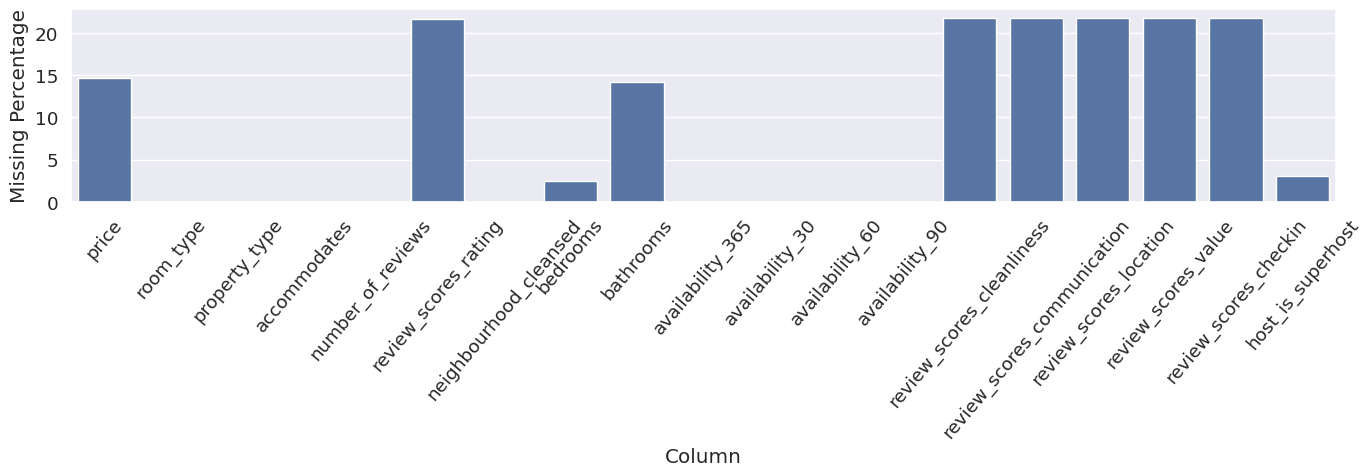

In [10]:
#creating a bar plot to visualize the missing percentage
sns.set(font_scale=1.2)
plt.figure(figsize=(14,5))
sns.barplot(data= missing_df.head(19),x='Column',y='Missing Percentage')
plt.xticks(rotation=50)
plt.tight_layout()

###**Missing Values handling:**
<div style="text-align: justify;">
The code below addresses missing values in the selected dataframe by replacing them with appropriate measures such as the median for numeric columns and the mode for categorical columns. It also adds additional columns to track where missing values were originally present, maintaining data integrity and preparing the dataset for analysis.
</div>

In [11]:
#Clean the 'price' column by removing '$' and ',' symbols, then convert it to numeric type
selected_df['price'] = selected_df['price'].replace('[\$,]', '', regex=True).astype(float)

#calculating the median, modes
price_median = selected_df['price'].median()
bedrooms_median = selected_df['bedrooms'].median()
bathrooms_median = selected_df['bathrooms'].median()
superhost_mode = selected_df['host_is_superhost'].mode()[0] #[0] returns the first mode at index 0 if there are multiple modes existing in that numeric column

#filling the missing values with the median or mode values
selected_df['price'].fillna(price_median, inplace=True)
selected_df['bedrooms'].fillna(bedrooms_median, inplace = True)
selected_df['bathrooms'].fillna(bathrooms_median, inplace=True)
selected_df['host_is_superhost'].fillna(superhost_mode, inplace=True)

#review_scores_* columns handling

review_columns = ['review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'review_scores_checkin']
for col in review_columns:
  median_value = selected_df[col].median()   #calculate median
  selected_df[col + '_missing'] = selected_df[col].isnull().astype(int)   #calculate median
  selected_df[col].fillna(median_value, inplace=True) #fill missing values with median





In [12]:
selected_df.isnull().any() #verification of the handling process

price                                  False
room_type                              False
property_type                          False
accommodates                           False
number_of_reviews                      False
review_scores_rating                   False
neighbourhood_cleansed                 False
bedrooms                               False
bathrooms                              False
availability_365                       False
availability_30                        False
availability_60                        False
availability_90                        False
review_scores_cleanliness              False
review_scores_communication            False
review_scores_location                 False
review_scores_value                    False
review_scores_checkin                  False
host_is_superhost                      False
review_scores_rating_missing           False
review_scores_cleanliness_missing      False
review_scores_communication_missing    False
review_scores_location_missing         False
review_scores_value_missing            False
review_scores_checkin_missing          False
dtype: bool

###**Removing duplicate Rows:**

In [13]:
print(f"Before removing duplicates: {selected_df.shape}\n")
selected_df1 = selected_df.drop_duplicates() #Remove duplicate rows from the DataFrame and store the result in a new variable
print(f"After removing duplicates: {selected_df1.shape}")

Before removing duplicates: (23564, 25)

After removing duplicates: (23008, 25)


#**Step3: Data Exploration**

In [14]:
selected_df1.describe().transpose() # Generate summary statistics for the dataset and transpose the result for easier interpretation

count         mean          std    min  \
price                                23008.0  2580.707580  8564.840178  160.0   
accommodates                         23008.0     3.793289     2.432421    1.0   
number_of_reviews                    23008.0    24.354572    46.023103    0.0   
review_scores_rating                 23008.0     4.803167     3.126755    1.0   
bedrooms                             23008.0     1.886561     1.494836    0.0   
bathrooms                            23008.0     1.639973     1.223972    0.0   
availability_365                     23008.0   202.727747   124.110150    0.0   
availability_30                      23008.0    15.630998    12.417680    0.0   
availability_60                      23008.0    34.468576    24.099260    0.0   
availability_90                      23008.0    54.311500    35.294098    0.0   
review_scores_cleanliness            23008.0     4.791372     0.355547    1.0   
review_scores_communication          23008.0     4.851692     0.353065    1.0   
review_scores_location               23008.0     4.827458     0.311758    1.0   
review_scores_value                  23008.0     4.736862     0.382572    1.0   
review_scores_checkin                23008.0     4.845926     0.345668    1.0   
review_scores_rating_missing         23008.0     0.200365     0.400282    0.0   
review_scores_cleanliness_missing    23008.0     0.200539     0.400412    0.0   
review_scores_communication_missing  23008.0     0.200582     0.400445    0.0   
review_scores_location_missing       23008.0     0.200626     0.400477    0.0   
review_scores_value_missing          23008.0     0.200669     0.400510    0.0   
review_scores_checkin_missing        23008.0     0.200669     0.400510    0.0   

                                        25%      50%      75%       max  
price                                850.00  1250.50  2186.25  999538.0  
accommodates                           2.00     3.00     5.00      16.0  
number_of_reviews                      1.00     7.00    26.00     756.0  
review_scores_rating                   4.75     4.88     5.00     466.0  
bedrooms                               1.00     1.00     2.00      50.0  
bathrooms                              1.00     1.00     2.00      50.0  
availability_365                      90.00   225.00   316.00     365.0  
availability_30                        0.00    19.00    28.00      30.0  
availability_60                        2.00    43.00    58.00      60.0  
availability_90                       16.75    67.00    88.00      90.0  
review_scores_cleanliness              4.76     4.89     5.00       5.0  
review_scores_communication            4.87     4.96     5.00       5.0  
review_scores_location                 4.81     4.91     5.00       5.0  
review_scores_value                    4.70     4.83     4.93       5.0  
review_scores_checkin                  4.85     4.95     5.00       5.0  
review_scores_rating_missing           0.00     0.00     0.00       1.0  
review_scores_cleanliness_missing      0.00     0.00     0.00       1.0  
review_scores_communication_missing    0.00     0.00     0.00       1.0  
review_scores_location_missing         0.00     0.00     0.00       1.0  
review_scores_value_missing            0.00     0.00     0.00       1.0  
review_scores_checkin_missing          0.00     0.00     0.00       1.0

###**Plotting the distribution of numerical variables:**

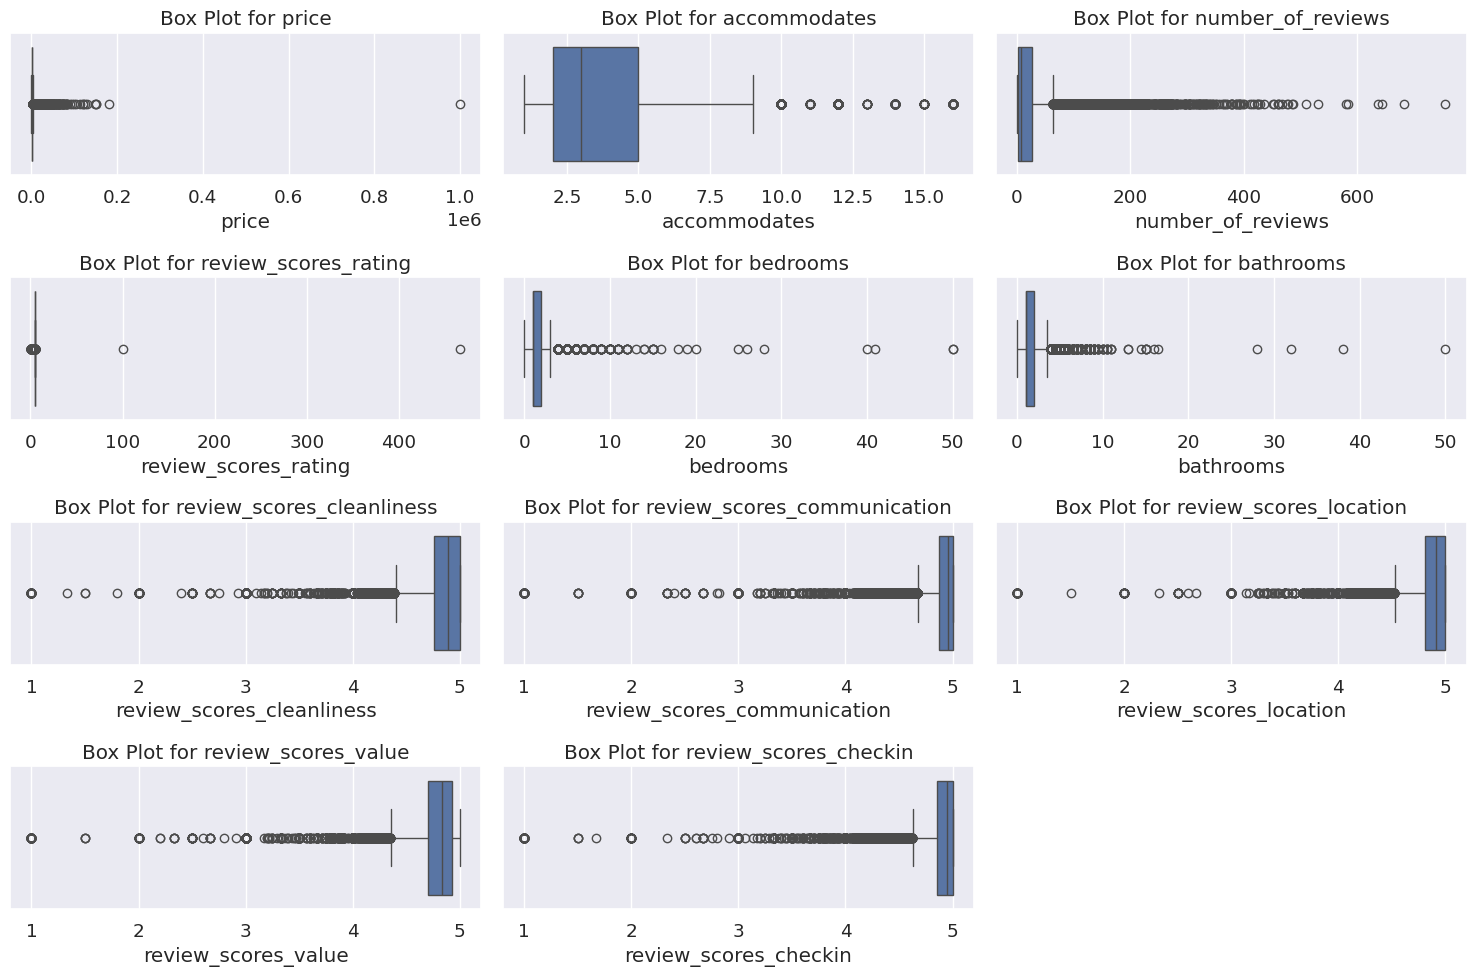

In [15]:
# List of numeric columns
numeric_cols = ['price', 'accommodates', 'number_of_reviews', 'review_scores_rating',
                'bedrooms', 'bathrooms', 'review_scores_cleanliness',
                'review_scores_communication', 'review_scores_location',
                'review_scores_value', 'review_scores_checkin']

# Set up the plotting area with a specified figure size
plt.figure(figsize=(15, 10))

# Loop through each numeric column to create a box plot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=selected_df1[col])
    plt.title(f'Box Plot for {col}')

#Adjust the layout to prevent overlap between plots
plt.tight_layout()

plt.show() #display all plots

### **Detecting Outliers:**
<div style="text-align: justify;">
The numerical columns appreared compressed and incomplete. This indicated the presence of extreme values that were skewing the data distribution, making it difficult to visualize and analyze effectively.

To address this, I used the Z-score method for outlier detection. The Z-score identifies data points that are more than 3 standard deviations away from the mean, based on the formula:
 Z = (X - µ)/σ
 where X is the data point, µ is the mean, and σ is the standard deviation. Values with Z -scores greater than 3 or less than -3 were flagged as outliers.

 The process involved:

 **Analyzing Outliers:** Calculating Z-scores for all numerical columns and identifying the number of outliers in each column.
</div>

In [16]:
#Identify the list of numerical columns (integer and float types) in the DataFrame
numeric_cols = selected_df1.select_dtypes(include=['float64', 'int64']).columns.tolist()

#Select numerical columns from the DataFrame for further analysis
numerical_columns_1 = selected_df1.select_dtypes(include=[np.number])

# Define the Z-score threshold for detecting outliers
# The common threshold is 3, indicating values more than 3 standard deviations from the mean.
z_threshold = 3

#Calculate the Z-scores for all numerical columns and identify values exceeding the threshold
#This generates a boolean mask for outliers across all numerical columns
outliers_numerical = np.abs(stats.zscore(selected_df1[numeric_cols])) > z_threshold
print("Number of outiers in each column is given below:")

#Loop through each column to calculate and count outliers
for col in numeric_cols:
  z_scores_1 = stats.zscore(selected_df[col])
  outliers_1 = selected_df1[(z_scores_1 > z_threshold) | (z_scores_1 < -z_threshold)]
  #If there are any outliers in the column, print the column name and cout of outliers
  if(len(outliers_1) > 0):
    print(f"{col}: {len(outliers_1)}")

Number of outiers in each column is given below:
price: 160
accommodates: 364
number_of_reviews: 569
review_scores_rating: 2
bedrooms: 188
bathrooms: 393
review_scores_cleanliness: 358
review_scores_communication: 369
review_scores_location: 293
review_scores_value: 409
review_scores_checkin: 373


### **Filtering out the Outliers:**

<div style="text-align: justify;">
To filter out outliers in the dataset, I used the percentile-based method. This approach involves identifying and removing data points that fall outside a specified range, defined by lower and upper percentiles. By setting lower and upper bounds (for example, the 1st and 99th percentiles), this method helps exclude extreme values that may skew the analysis without losing too much data. The filtering process ensures that only values within this range are retained, making the dataset more representative of the typical values and improving the quality of subsequent analyses. This method is particularly useful when you want to avoid the influence of outliers without needing complex statistical models.
</div>

In [17]:
# Define a function to filter outliers using percentiles
def remove_outliers_percentile(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    df_filtered = df.copy()
    for col in columns:
        lower_bound = df_filtered[col].quantile(lower_percentile)
        upper_bound = df_filtered[col].quantile(upper_percentile)
        # Keep only rows where the value is within the bounds
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    return df_filtered

# Apply function to remove outliers based on percentile range
df_no_outliers = remove_outliers_percentile(selected_df1, numeric_cols)
print(f"Original shape: {selected_df1.shape}, New shape after percentile filtering: {df_no_outliers.shape}")

Original shape: (23008, 25), New shape after percentile filtering: (20713, 25)


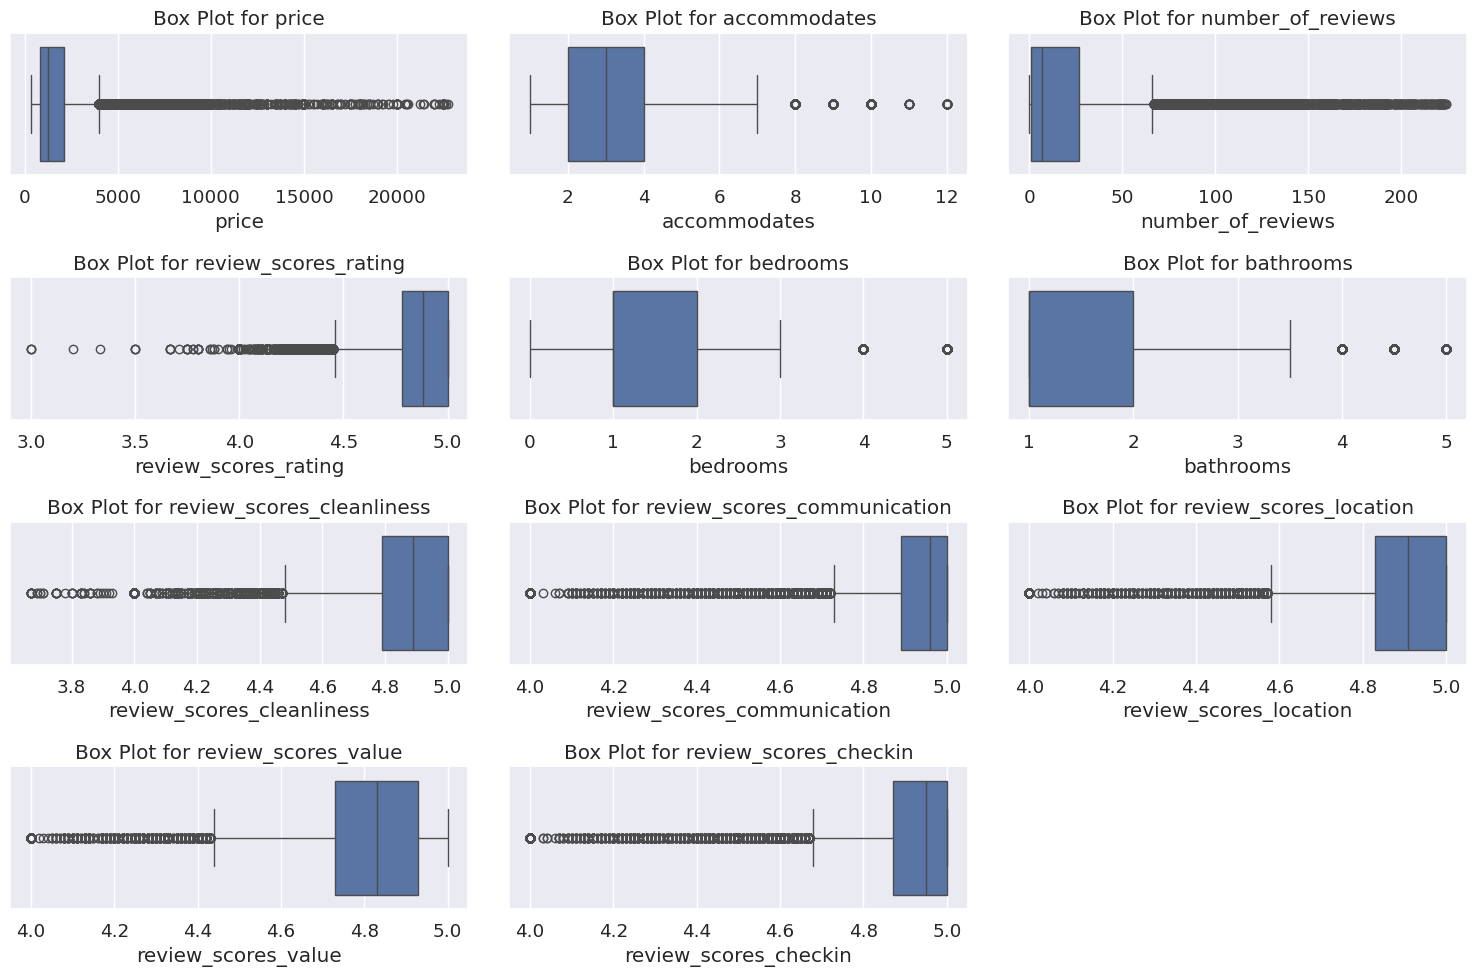

In [18]:
# List of numeric columns
numeric_cols = ['price', 'accommodates', 'number_of_reviews', 'review_scores_rating',
                'bedrooms', 'bathrooms', 'review_scores_cleanliness',
                'review_scores_communication', 'review_scores_location',
                'review_scores_value', 'review_scores_checkin']

# Set up the plotting area
plt.figure(figsize=(15, 10))

# Loop through each numeric column to create a box plot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x= df_no_outliers[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

<div style="text-align: justify;">
By removing these outliers, the box plots became more representative of the data distribution, allowing for clearer visualization and analysis. This step ensured that the dataset more accurately reflected the central trends, improving the quality of insights and subsequent modeling.
</div>

##**Finding the distribution of key variables**
<div style="text-align: justify;">

**1. UNIVARIATE ANALYSIS:** Plotting histograms for individual variables allows you to see their frequency distribution and idscover patterns like skewness, central tendency and spread.

For continuous variables such as price and review_scores_*, histograms are shown with kenel Density Estimation (KDE ) curves to create a smooth depiction of the data distribution. Histograms aid in understanding the distribution of data points and identifying probable outliers or strange patterns, if any.

Furthermore, different histograms are presented for various availability and review-related factors, providing a thorough picture of how each variable acts across the dataset. Examining these visualizations provides insights into the data's underlying structure which is an important step in exploratory data analysis (EDA) for subsequent modeling or analysis.
</div>

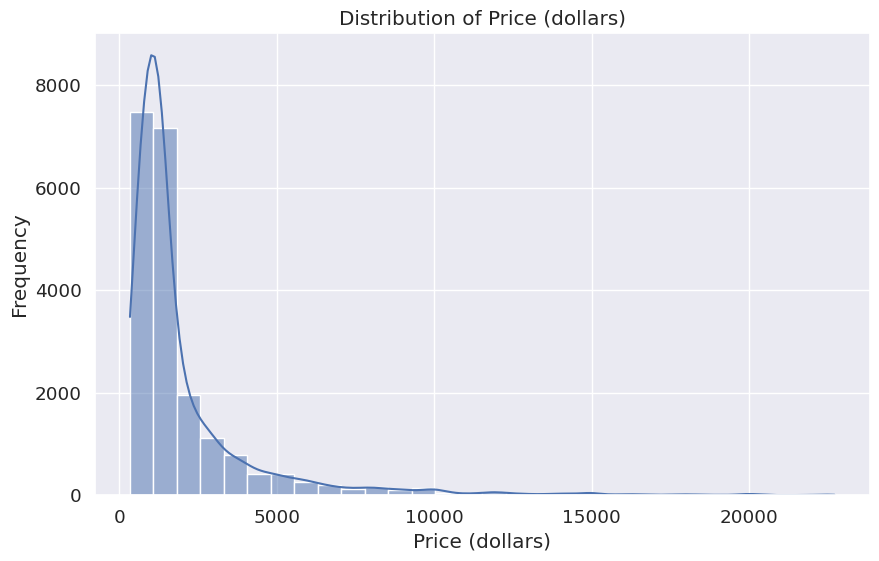

In [19]:
plt.figure(figsize=(10, 6)) #Set up the plot with a specified figure size

#Plot a histogram of the price column from the filtered DataFrame with 30 bins
sns.histplot(df_no_outliers['price'], bins=30, kde=True) # The KDE (Kernel Density Estimation) is added to visualize the distribution curve
plt.title('Distribution of Price (dollars)')
plt.xlabel('Price (dollars)')
plt.ylabel('Frequency')
plt.show()

<div style="text-align: justify;">
The price distribution is highly right-skewed, with the majority of listings concentrated in the lower price range (0 - 2000), indicating that most listings cater to budget - friendly travelers. As prices rise above 5000, the frequency -of listings drops sharply, indicating that high - priced accommodations are relatively rare. The presence of a few outliers with exceptionally high prices highlights the need to investigate these listings further to understand the factors driving their cost, such as luxury amenities or premium locations.
</div>

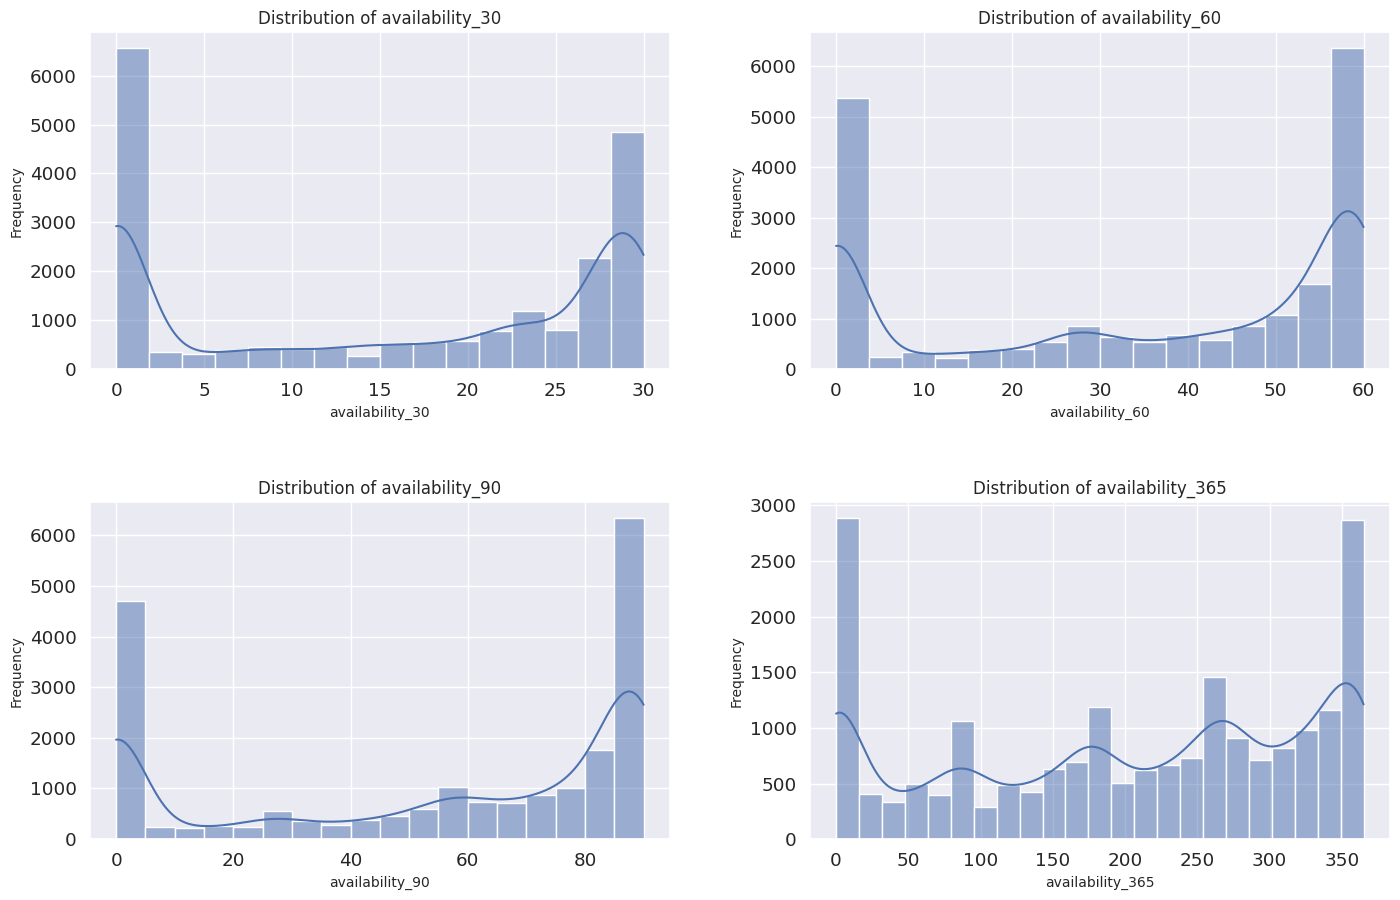

In [20]:

# List of availability columns
key_variables = ['availability_30', 'availability_60', 'availability_90',
                     'availability_365']

# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Loop through the numerical columns and plot histograms
for i, column in enumerate(key_variables, 1):
    plt.subplot(2, 2, i)  # Create 2 rows, 2 columns for the subplots
    sns.histplot(df_no_outliers[column], kde=True)  # Plot histogram with KDE
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column,fontsize =10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout(pad=3.0)  # Adjust the layout to avoid overlap
plt.show()

<div style="text-align: justify;">

**Short- Term Availability (30, 60 and 90 days):** The distributions show a bimodal patter, with peaks at zero availability and maximum availability for each respective period. This suggests that a significant protion of listings are either fully unavailable or fully available within these time frames, likely reflecting distinct host strategies (e.g., occasional vs. always-on hosting).

**Long-Term Availability (365 days):** The distribution also exhibits a bimodal trend, with notable peaks at zero availability and close to 365 days. However, there is a more even spread across intermediate values, indidcating a mix of short-term and year-round availability for some listings. This could be influenced by seasonal demand or part - time hosting preferences.

These patterns highlight the diversity in hosting behavior and could inform segmentation strategies or recommendations for maximizing booking potential.
</div>

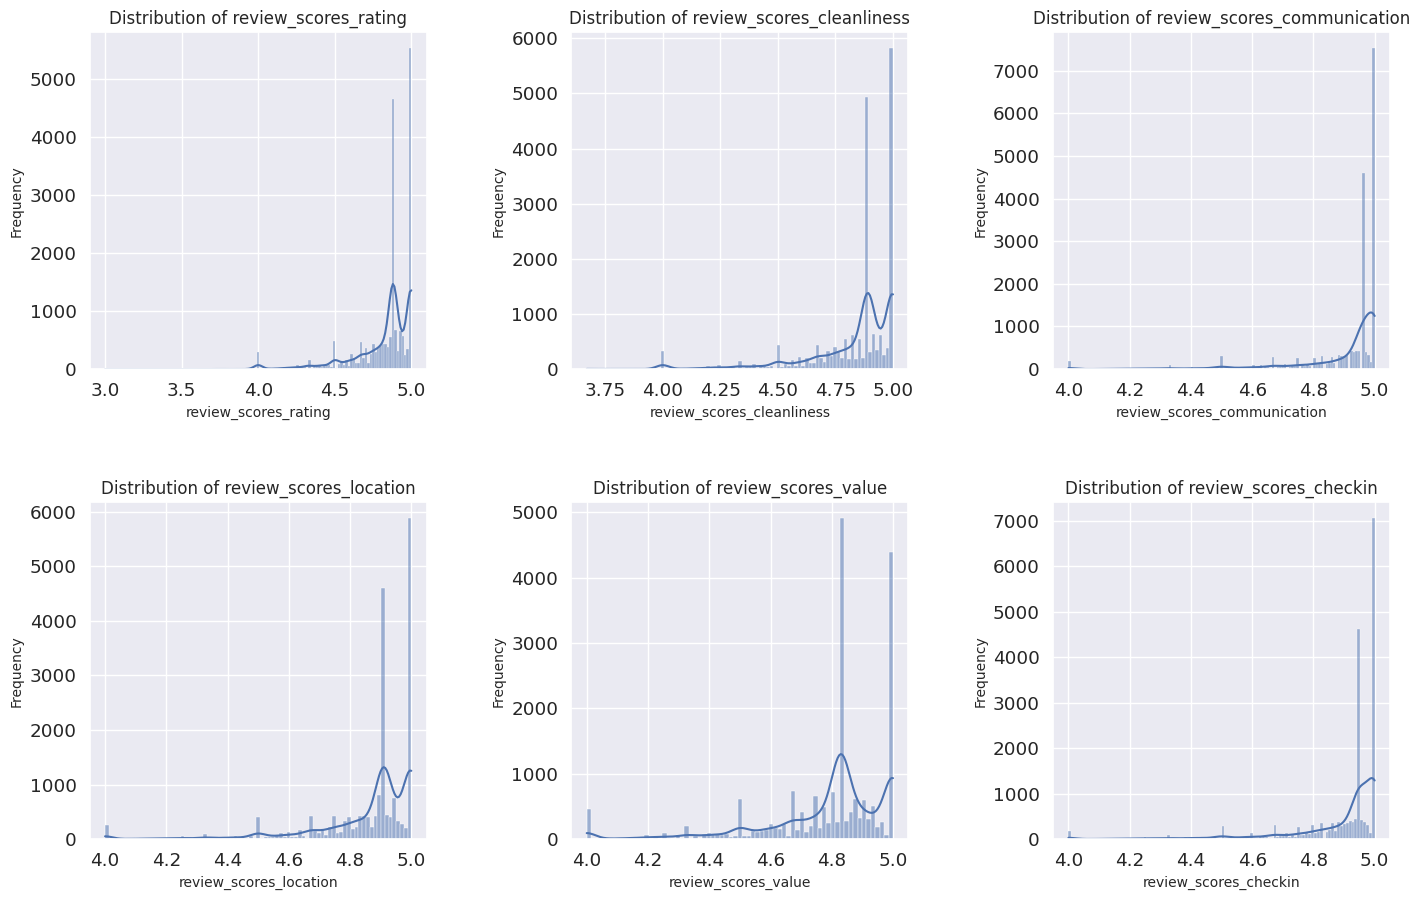

In [21]:

# List of Review columns
key_variables = ['review_scores_rating', 'review_scores_cleanliness',
                     'review_scores_communication', 'review_scores_location',
                     'review_scores_value', 'review_scores_checkin']

# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Loop through the numerical columns and plot histograms
for i, column in enumerate(key_variables, 1):
    plt.subplot(2, 3, i)  # Create 2 rows, 3 columns for the subplots
    sns.histplot(df_no_outliers[column], kde=True)  # Plot histogram with KDE
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column,fontsize =10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout(pad=3.0)  # Adjust the layout to avoid overlap
plt.show()

The distribution of review_scores_* columns is shown above.

#**Exploring the relationship between relevant variables**

###**2. MULTIVARIATE ANALYSIS:**
<div style="text-align: justify;">
To explore and identify relationships between multiple key variables in the dataset. This helps in understanding how different features are interrelated and how they affect each other.

**Scatter Plots:** Scater plots are used to visualize the relationship between two continuous variables, such as price vs bedrooms. These plots help in identifying trends, clusters or potential correlations between the variables.

These visualizations enable better understanding of how different variables interact with one another and help uncover patterns or insights that might not be evident when looking at individual variables. This type of analysis is crucial for making informed decisions and drawing meaningful conclusions from the data.
</div>

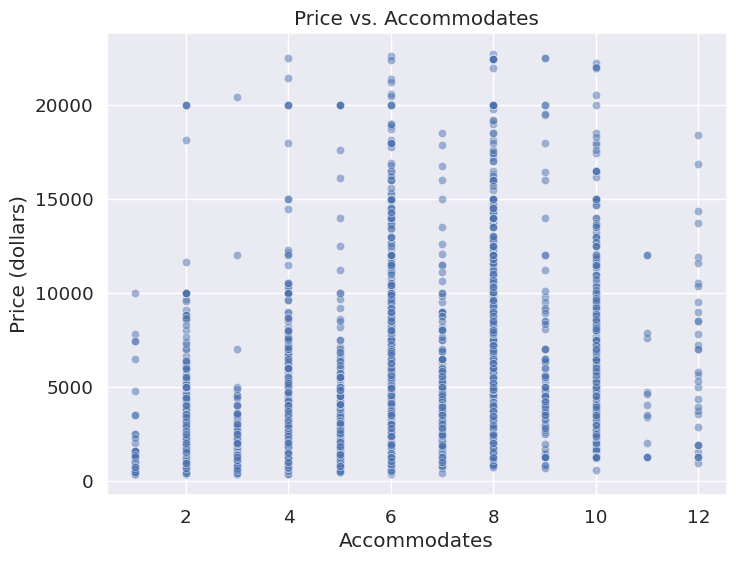

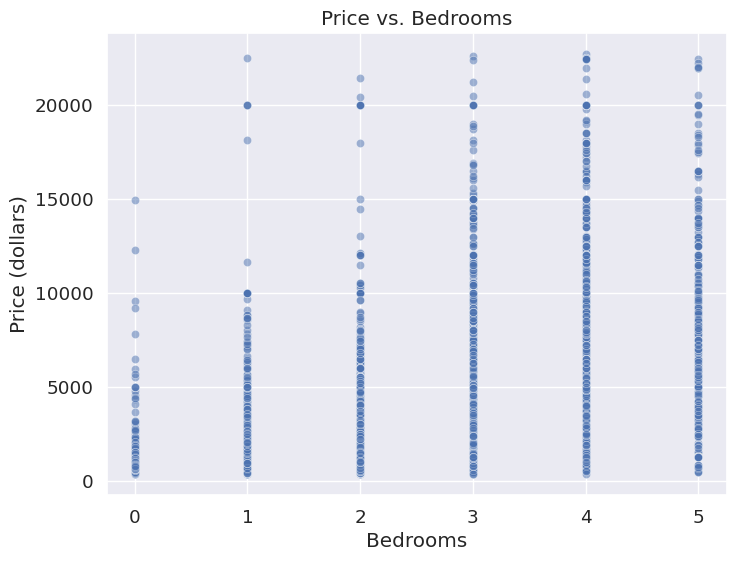

In [22]:
# Scatter plot for price vs. accommodates
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_no_outliers, x='accommodates', y='price', alpha=0.5)
plt.title('Price vs. Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price (dollars)')
plt.show()

# Scatter plot for price vs. bedrooms
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_no_outliers, x='bedrooms', y='price', alpha=0.5)
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price (dollars)')
plt.show()


<div style="text-align: justify;">
The scatter plots shows a positive correlation between price and number of bedrooms and accomodates, with prices generally increasing as each category increase. However, there's significant price variation within each category, indicating other factors influence pricing. Outliers suggest luxury or premium listings.
</div>

**Bar Plot (Average Price by Property Category):** <div style="text-align: justify;"> A bar plot is used to show the average price for different property categories. By categorizing properties into broader groups (eg., 'Entire Place', 'Private Room', etc.), it becomes easier to compare how price varies across property types.
</div>

In [23]:
# Create a mapping for broader property categories
property_mapping = {
    'Entire home': 'Entire Place',
    'Entire rental unit': 'Entire Place',
    'Entire guest suite': 'Entire Place',
    'Entire guesthouse': 'Entire Place',
    'Entire villa': 'Entire Place',
    'Entire loft': 'Entire Place',
    'Entire cottage': 'Entire Place',
    'Entire serviced apartment': 'Entire Place',
    'Entire condo': 'Entire Place',
    'Entire townhouse': 'Entire Place',
    'Entire bungalow': 'Entire Place',
    'Entire cabin': 'Entire Place',
    'Entire chalet': 'Entire Place',
    'Entire vacation home': 'Entire Place',
    'Entire serviced apartment': 'Entire Place',
    'Private room in rental unit': 'Private Room',
    'Private room in home': 'Private Room',
    'Private room in guesthouse': 'Private Room',
    'Private room in cottage': 'Private Room',
    'Private room in condo': 'Private Room',
    'Private room in serviced apartment': 'Private Room',
    'Private room': 'Private Room',
    'Shared room': 'Shared Room',
    'Room in boutique hotel': 'Hotel Room',
    'Room in serviced apartment': 'Hotel Room',
    'Room in aparthotel': 'Hotel Room',
    'Room in bed and breakfast': 'Hotel Room',
    'Room in hostel': 'Hotel Room',
    # Group unique stays like treehouses, barns, etc.
    'Treehouse': 'Unique Stay',
    'Barn': 'Unique Stay',
    'Camper/RV': 'Unique Stay',
    'Shepherd’s hut': 'Unique Stay',
    'Castle': 'Unique Stay',
    'Shipping container': 'Unique Stay',
    'Houseboat': 'Unique Stay',
}

# Apply the mapping to the property_type column
df_no_outliers['property_category'] = df_no_outliers['property_type'].map(property_mapping).fillna('Other')

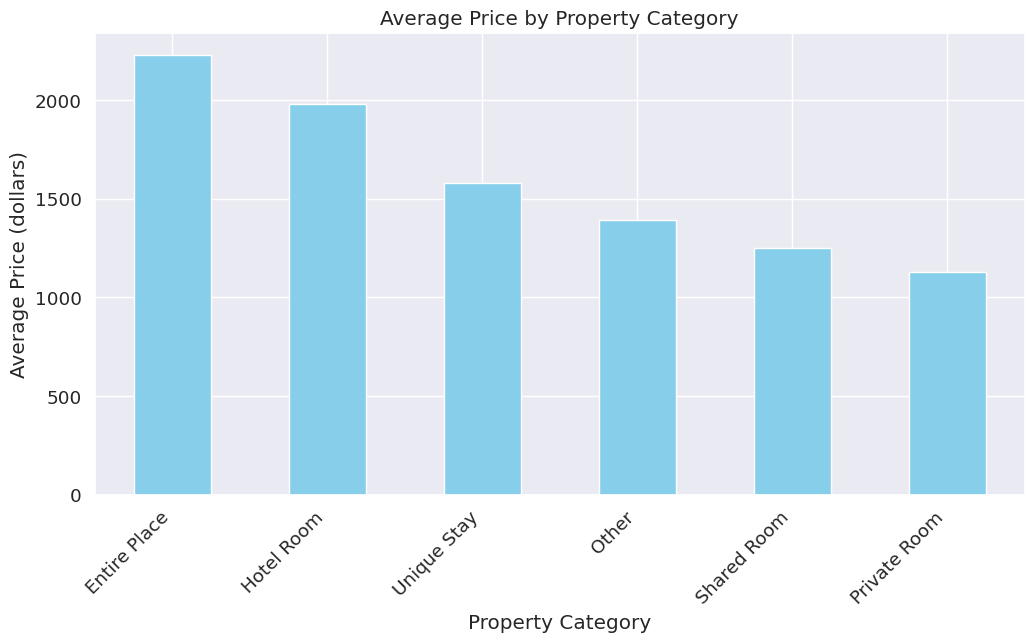

In [24]:
#Calculate the average price for each property category, sort them in descending order
avg_price_by_category = df_no_outliers.groupby('property_category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

#Create a bar plot for average price by property category
avg_price_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Price by Property Category')
plt.xlabel('Property Category')
plt.ylabel('Average Price (dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()


**Box Plots:** <div style="text-align: justify;">Box plots are used to visualize the distribution of price across different cateogrical variables, such as property_type and room_type. By using a log scale on the y-axis, these plots handle any large price range more effectively and allow for the identification of potential outliers within each category.
</div>

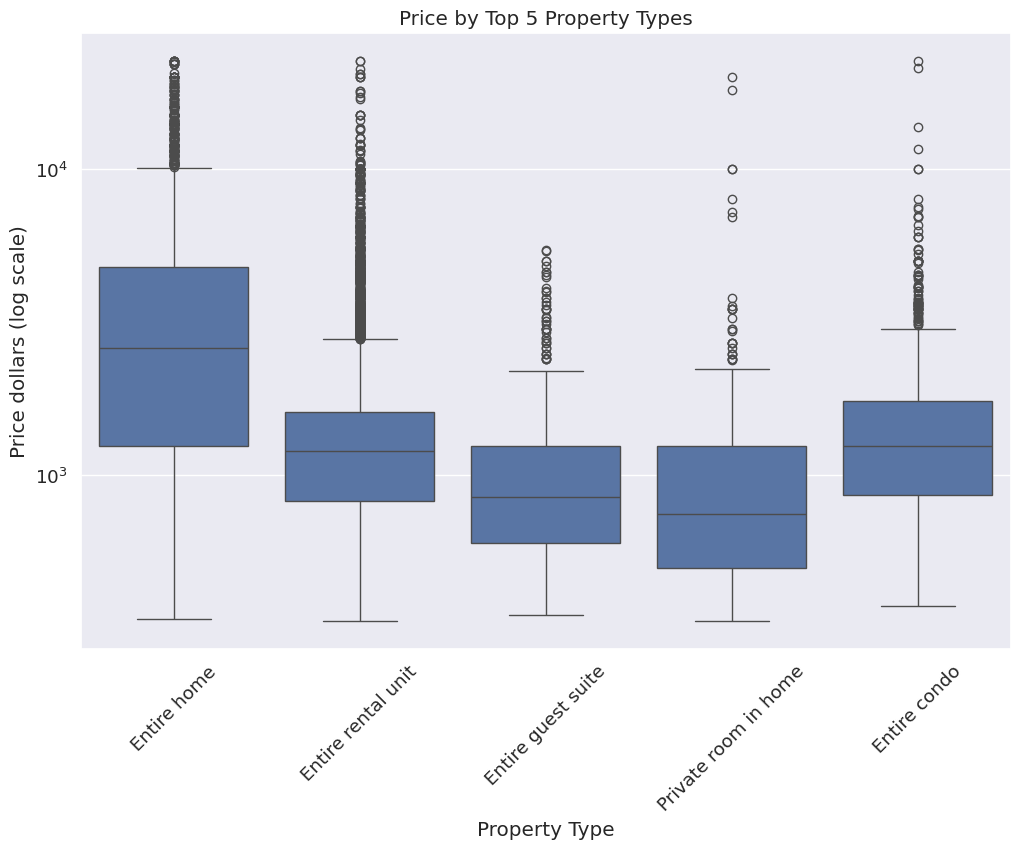

In [25]:
# Get the top 5 most common property types
top_property_types = df_no_outliers['property_type'].value_counts().nlargest(5).index

# Filter the DataFrame to only include rows with the top 5 property types
filtered_df = df_no_outliers[df_no_outliers['property_type'].isin(top_property_types)]

# Adjust the figure size and add a log scale for price if necessary
plt.figure(figsize=(12, 8))  # Increase the size for better readability

# Box plot with log scale for price
sns.boxplot(data=filtered_df, x='property_type', y='price')
plt.yscale('log')  # Use a log scale if there's a wide range in price
plt.title('Price by Top 5 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Price dollars (log scale)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

<div style="text-align: justify;">
The box plot displays price distributions (on a log scale) for the top 5 property types. "Entire home" has the highest median price and wider variability, indicating luxury listings. "Entire rental unit" and "Entire condo" follow with slightly lower medians. "Private room in home" and "Entire guest suite" are more affordable options, with narrower price ranges. Outliers exist across all property types, representing premium listings.
</div>

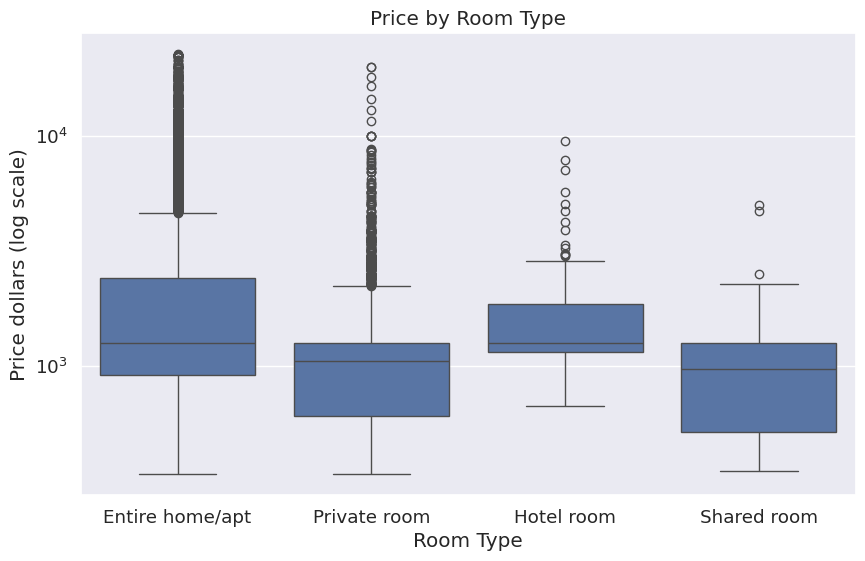

In [26]:
# Box plot for price vs. room_type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='room_type', y='price')
plt.yscale('log')
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price dollars (log scale)')
plt.show()

<div style="text-align: justify;">These visualizations enable better understanding of how different variables interact with one another and help uncover patterns or insights that might not be evident when looking at individual variables. This type of analysis is crucial for making informed decisions and drawing meaningful conclusions from the data.
</div>

###**3. CORRELATION ANALYSIS:**
<div style="text-align: justify;">
Correlation analysis was performed to understand the relationships between numerical variables in the dataset, focusing on both general numerical features and review scores. This analysis helps to identify how strongly certain variables are related to each other and whether the relationships are positive or negative.

**1. Correlation Heatmap for Numerical Variables:**
A heatmap was plotted to visualize the correlations between key numerical variables like price, accommodates, number_of_reviews and others. This provides a clear overview of how these variables interact, helping to spot patterns such as whether higher prices are associated with more bedrooms or better review scores.
</div>




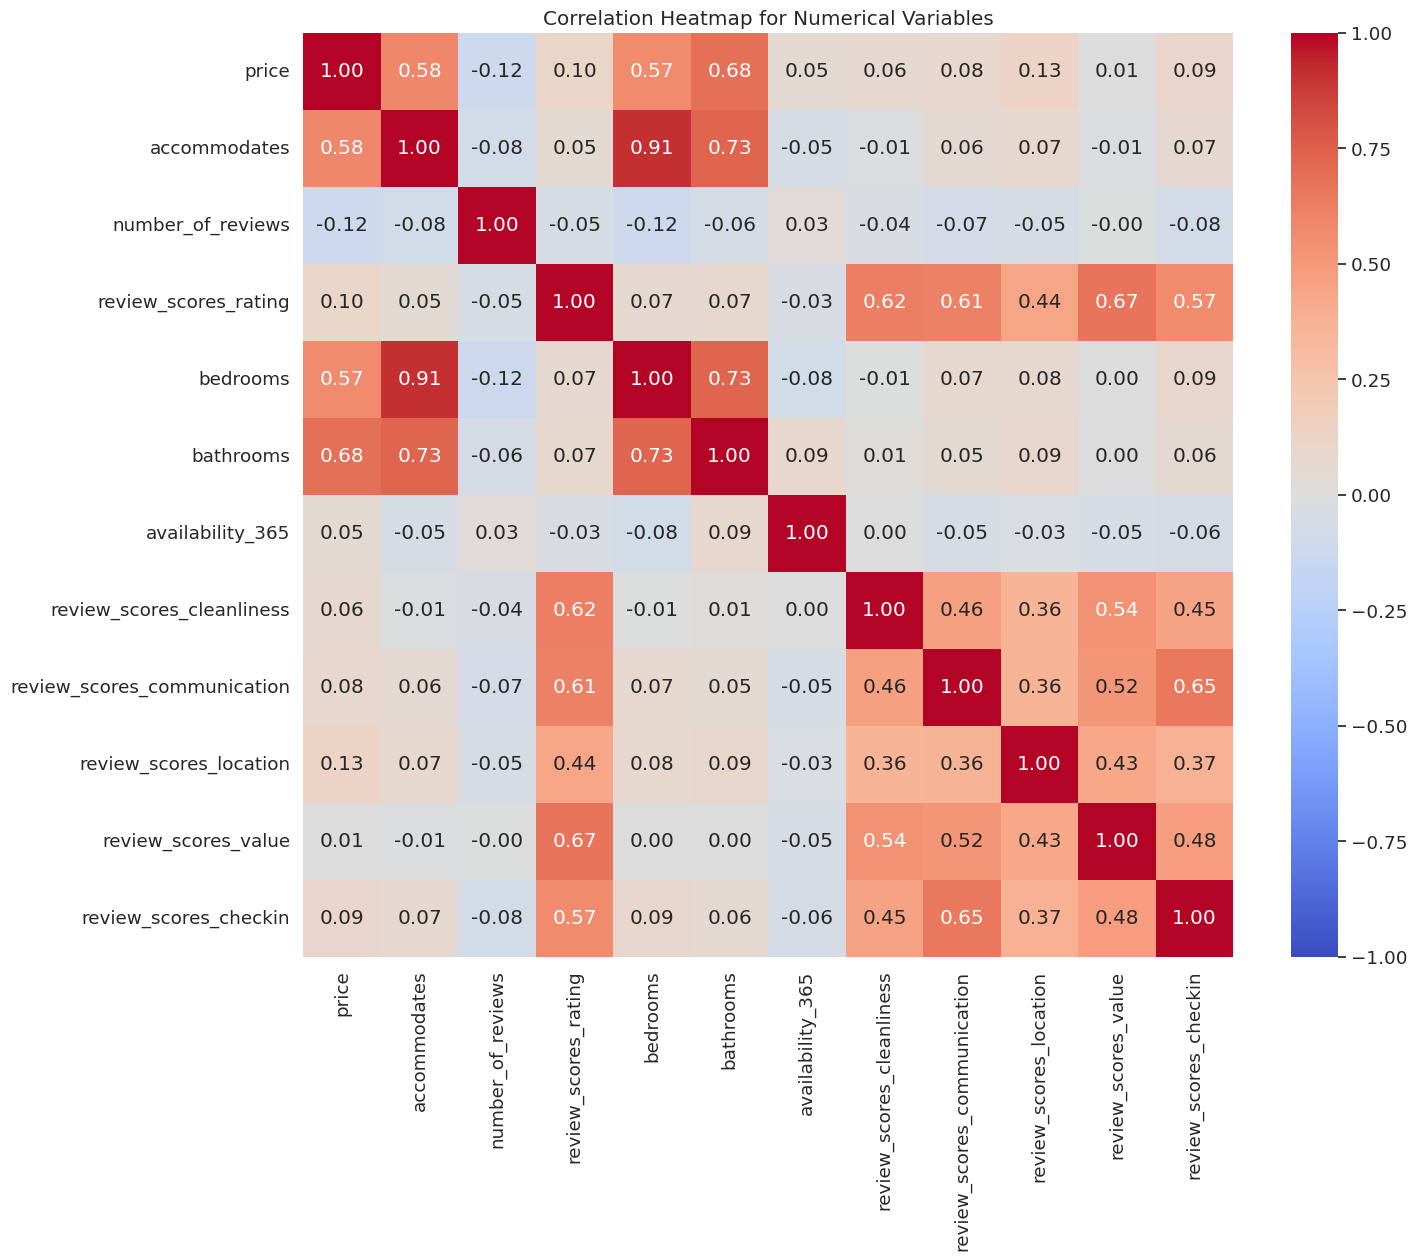

In [27]:

correlation_cols = ['price', 'accommodates', 'number_of_reviews', 'review_scores_rating',
                    'bedrooms', 'bathrooms', 'availability_365', 'review_scores_cleanliness',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value', 'review_scores_checkin']

# Calculate the correlation matrix
correlation_matrix = df_no_outliers[correlation_cols].corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

<div style="text-align: justify;">
The heatmap shows that price is moderately correlated with the number of bathrooms (0.68), bedrooms (0.57) and accommodates (0.58), indicating these features strongly influence pricing. Review scores have weak correlations with price and availability, highlighting their limited impact. Bathrooms and bedrooms are highly correlated (0.73), reflecting their joint contribution to property size.
</div>

**2. Correlation Matrix for Review Scores:**
A separate correlation matrix was created for review-related features like cleanliness, communication, location, value and check-in. This analysis aims to determine how individual review aspects relate to the overall rating (review_scores_rating), shedding light on which factors most influence guest satisfaction.

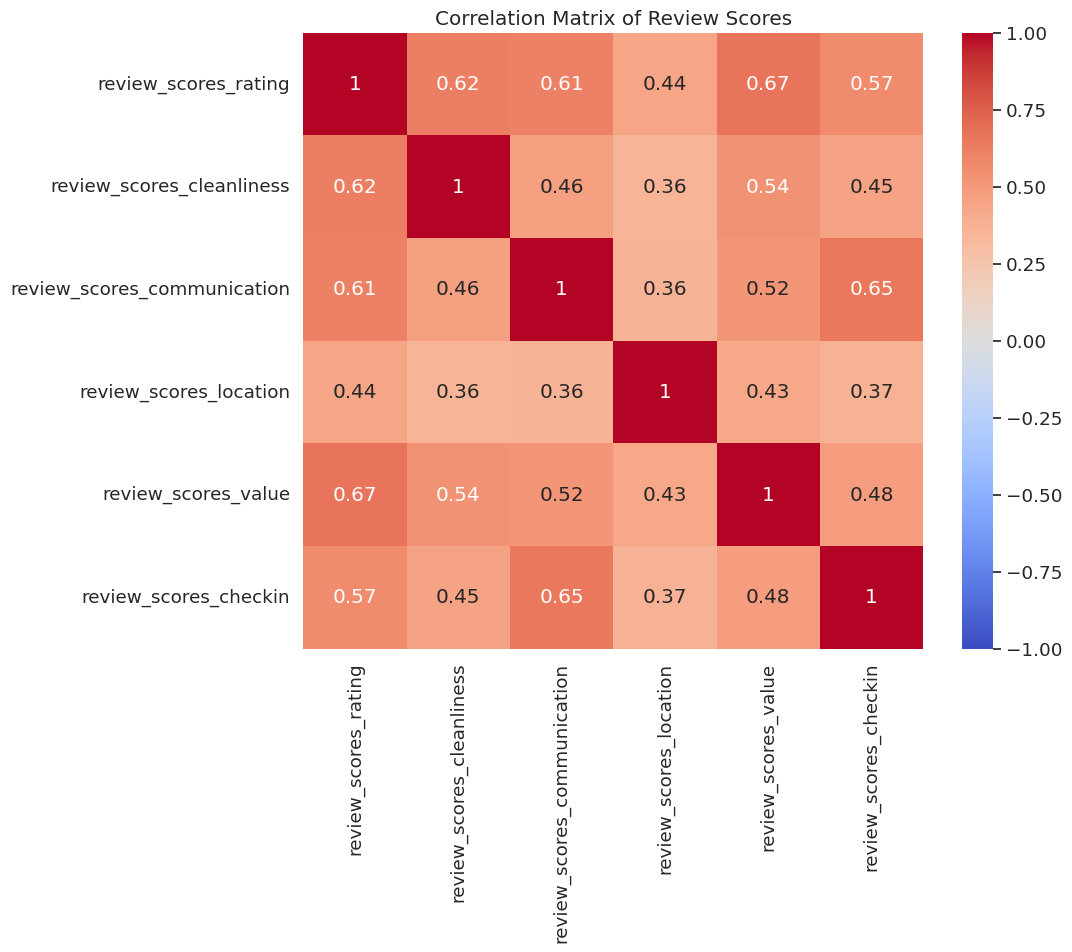

Most strongly correlated review scores with overall rating:
 review_scores_rating           1.000000
review_scores_value            0.670734
review_scores_cleanliness      0.624949
review_scores_communication    0.612945
review_scores_checkin          0.569161
review_scores_location         0.444872
Name: review_scores_rating, dtype: float64


In [28]:
review_scores_columns = ['review_scores_rating', 'review_scores_cleanliness',
                     'review_scores_communication', 'review_scores_location',
                     'review_scores_value', 'review_scores_checkin']
correlation_matrix = df_no_outliers[review_scores_columns].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Review Scores')
plt.show()

# Find the most strongly correlated review scores with overall review_scores_rating
correlated_scores = correlation_matrix['review_scores_rating'].sort_values(ascending=False)
print("Most strongly correlated review scores with overall rating:\n", correlated_scores)


###**4. GEOSPATIAL ANALYSIS:**
It helps to uncover potential location-driven factors influencing pricing. It provides actionable insights into neighborhood preferences, enabling better pricing strategies and targeted marketing for high-demand areas.

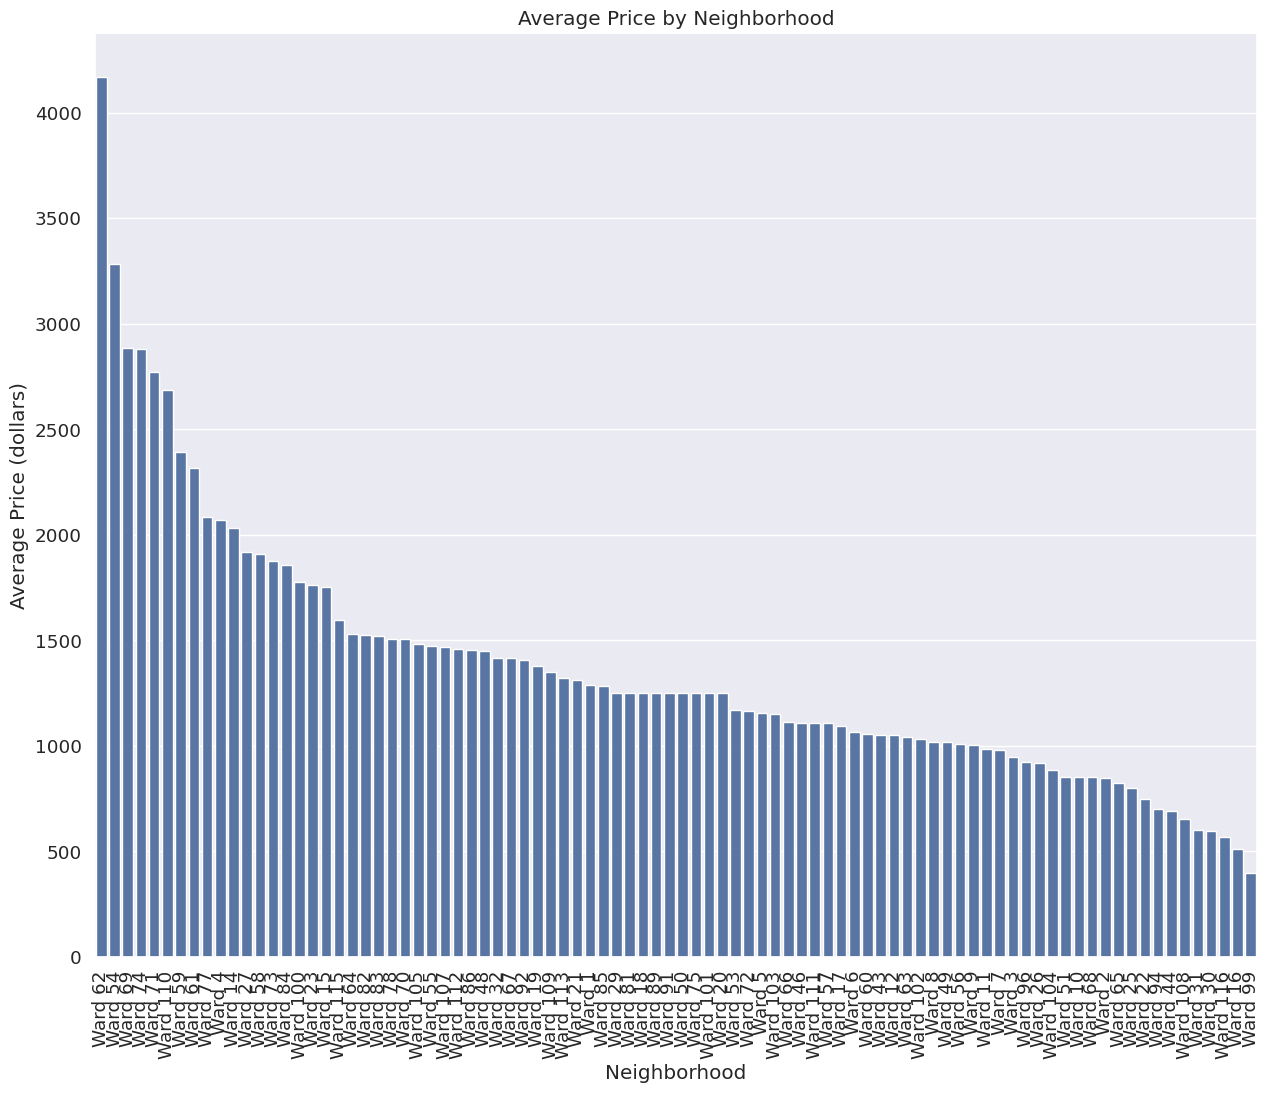

In [29]:
plt.figure(figsize=(15, 12))
mean_prices = df_no_outliers.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False) #calculate the average price for each neighborhood and sort in descending order
sns.barplot(x=mean_prices.index, y=mean_prices.values) #create a bar plot to visualize the average price per neighborhood
plt.xticks(rotation=90) #rotate the x-axis for better readability
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (dollars)')
plt.show()

The bar chart shows the average price distribution across neighbourhoods. A few neighborhoods have significantly higher average prices, while most neighborhood exhibit moderate to low pricing. This suggests price disparities based on location, with premium neighborhoods commanding higher rates.

###**5. TREND ANALYSIS:**
<div style="text-align: justify;">
By grouping data based on features like room_type and neighbourhood_cleansed, it aim to uncover patternas that reveal how listing availability varies depending on property type or location.

**Room-Type-Based Analysis:**
We calculate the average availability for each room_type and visualize it through a bar chart. This helps to identify which room types have higher availability on average, providing insights into market dynamics for different accomodation types.
</div>

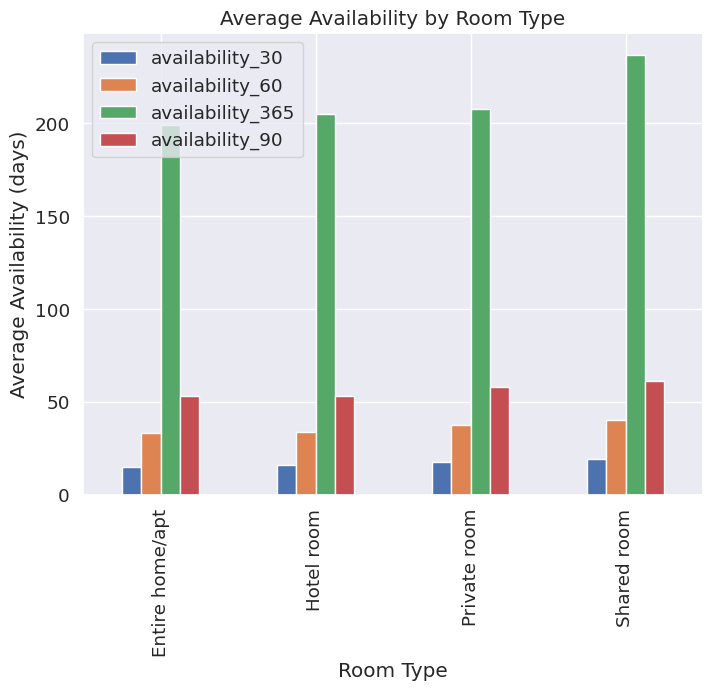

In [30]:
#calculate average availability for each room type
avg_availability_by_room_type = df_no_outliers.groupby('room_type')[['availability_30','availability_60','availability_365','availability_90']].mean()

#create a bar plot to visualize the availability by room type
avg_availability_by_room_type.plot(kind='bar', figsize=(8, 6))
plt.title('Average Availability by Room Type')
plt.ylabel('Average Availability (days)')
plt.xlabel('Room Type')
plt.show()

**Neighborhood-Based Analysis:**<div style="text-align: justify;">
To analyze trends at the neighborhood level, we calculate the average availability_365 (year round availability) for each neighborhood. The top 15 neighborhoods with the highest average availability are highlighted in a line plot. This reveals location-specific availability trends, helping to identify neighborhoods with a higher prevalence of consistently available listings.
</div>


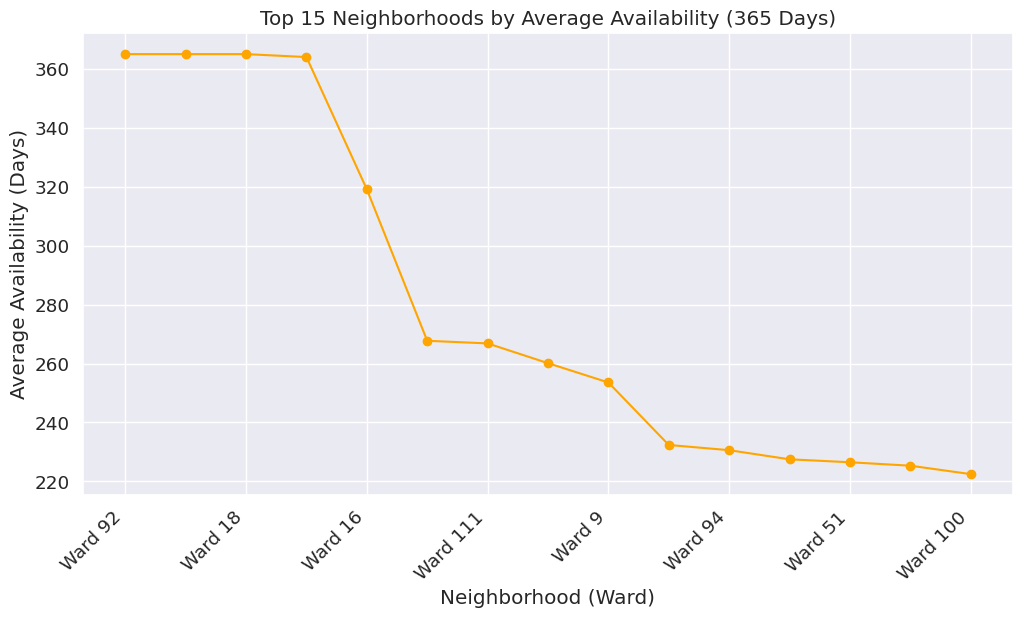

In [31]:
# Calculate average availability for each neighborhood
avg_availability_by_ward = df_no_outliers.groupby('neighbourhood_cleansed')['availability_365'].mean()

# Sort neighborhoods by average availability and select the top 15
top_wards_by_availability = avg_availability_by_ward.sort_values(ascending=False).head(15)

# Plot the top 15 neighborhoods
plt.figure(figsize=(12, 6))
top_wards_by_availability.plot(kind='line', marker='o', color='orange')
plt.title('Top 15 Neighborhoods by Average Availability (365 Days)')
plt.xlabel('Neighborhood (Ward)')
plt.ylabel('Average Availability (Days)')
plt.xticks(rotation=45, ha='right')
plt.show()

<div style="text-align: justify;">The above line chart highlights the top 15 neighborhoods based on average availability in days. Some neighborhoods, like Ward 92, Ward 18 and Ward 16, maintain near full-year availability, while others show a decline in average availability, indicating variation in how frequently properties are listed or occupied across these areas.
</div>

###**6. COMPARATIVE ANALYSIS:**
<div style="text-align: justify;">
This analysis employs comparative visualization techniques to evaluate how different listing features and host attributes influence guest satisfaction and review scores. By leveraging box/violin plots and density charts, we uncover patterns and trends that distinguish room types, property types and host behaviors.



**Violin plots** are used to compare the distribution of review scores across room_type and property_category.
</div>



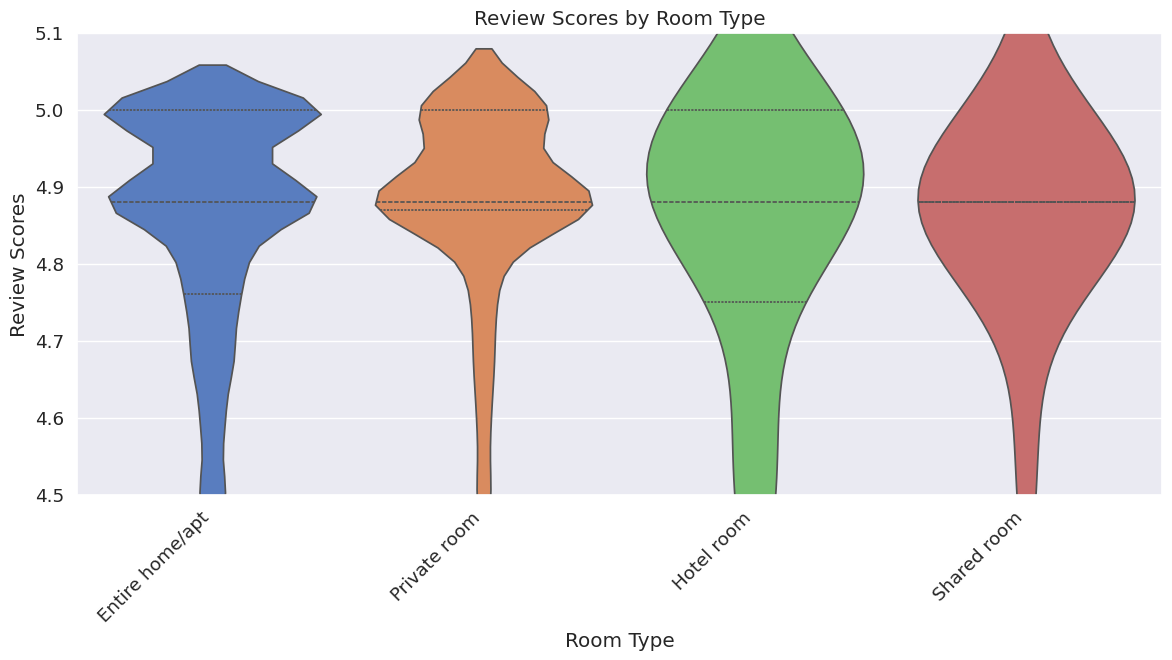

In [32]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_no_outliers, x='room_type', y='review_scores_rating', inner='quartile', palette='muted')
plt.title('Review Scores by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Review Scores')
plt.ylim(4.5, 5.1)  # Focus on the upper range of scores
plt.xticks(rotation=45, ha='right')
plt.show()

<div style="text-align: justify;">
The violin plot illustrates the distribution of review scores across different room types, highlighting variations in guest satisfaction. Entire home/apartment and private rooms exhibit higher and more consistent review scores, with most ratings clustering near 5, indicating greater guest satisfaction. Hotel rooms on the other hand, show a broarder spread of review scores, reflecting mixed guest experiences. Shared rooms have the lowest scres and the widest distribution, suggesting a higher variability in guest satisfaction. Overall, entire homes/apartments and private rooms tend to provide a more positively rated experience compared to other room types.
</div>

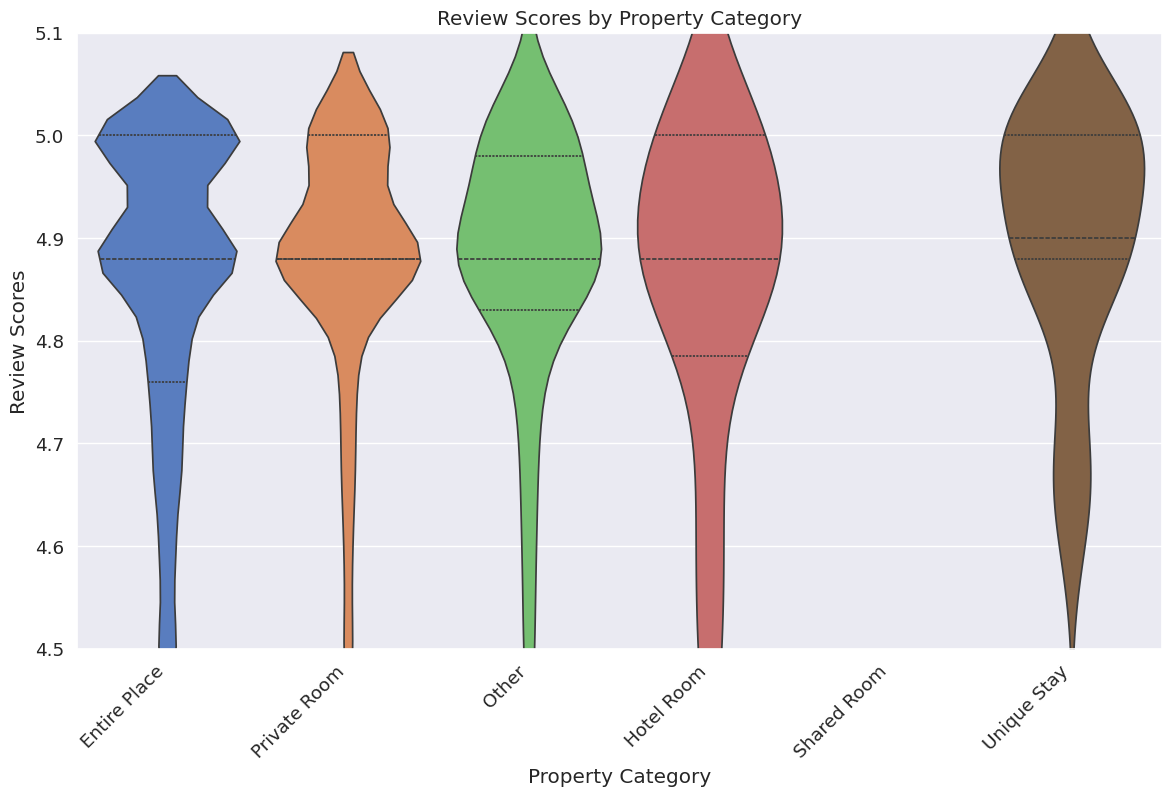

In [33]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_no_outliers, x='property_category', y='review_scores_rating', inner='quartile', palette='muted')
plt.title('Review Scores by Property Category')
plt.xlabel('Property Category')
plt.ylabel('Review Scores')
plt.ylim(4.5, 5.1)  # Adjust to focus on the upper range
plt.xticks(rotation=45, ha='right')
plt.show()

<div style="text-align: justify;">

**A density analysis** investigates the relationship between the host_is_superhost status and review scores across multiple criteria (e.g., cleanliness, communication, location).
</div>

In [34]:
# Downsample non-superhosts to match the number of superhosts
superhost = df_no_outliers[df_no_outliers['host_is_superhost'] == 't']
non_superhost = df_no_outliers[df_no_outliers['host_is_superhost'] == 'f'].sample(len(superhost), random_state=42)

# Combine the balanced dataset
balanced_df = pd.concat([superhost, non_superhost])

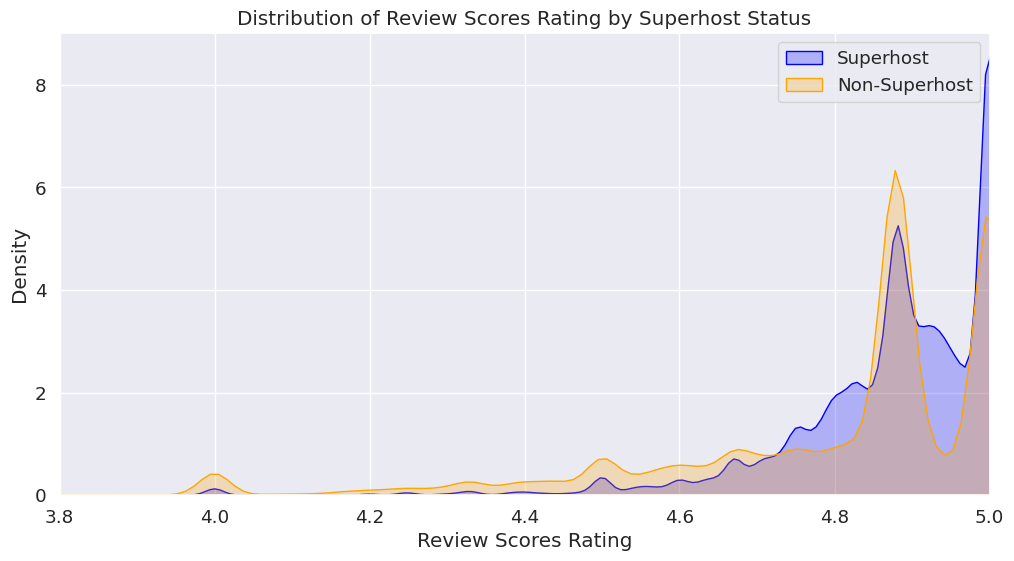

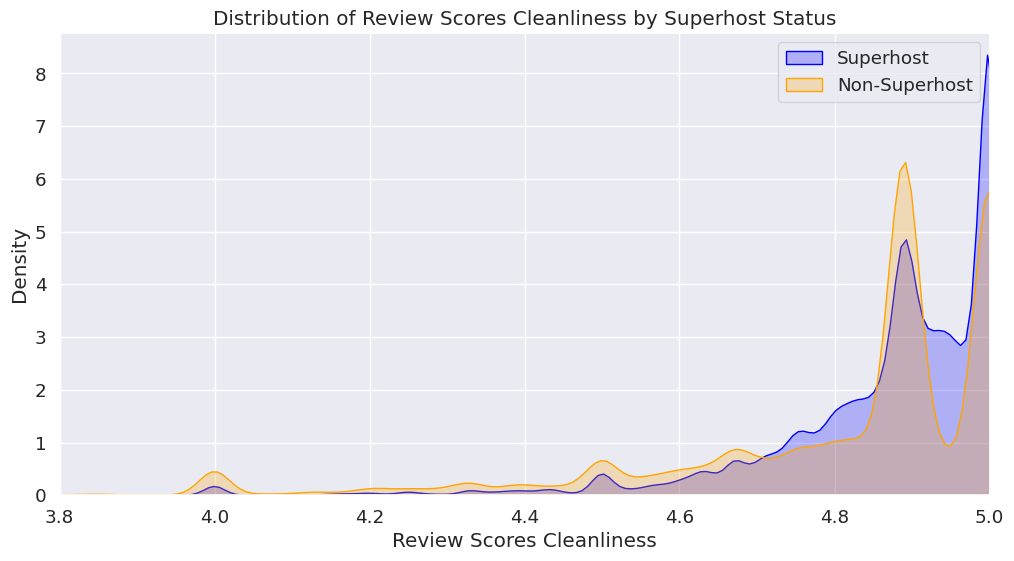

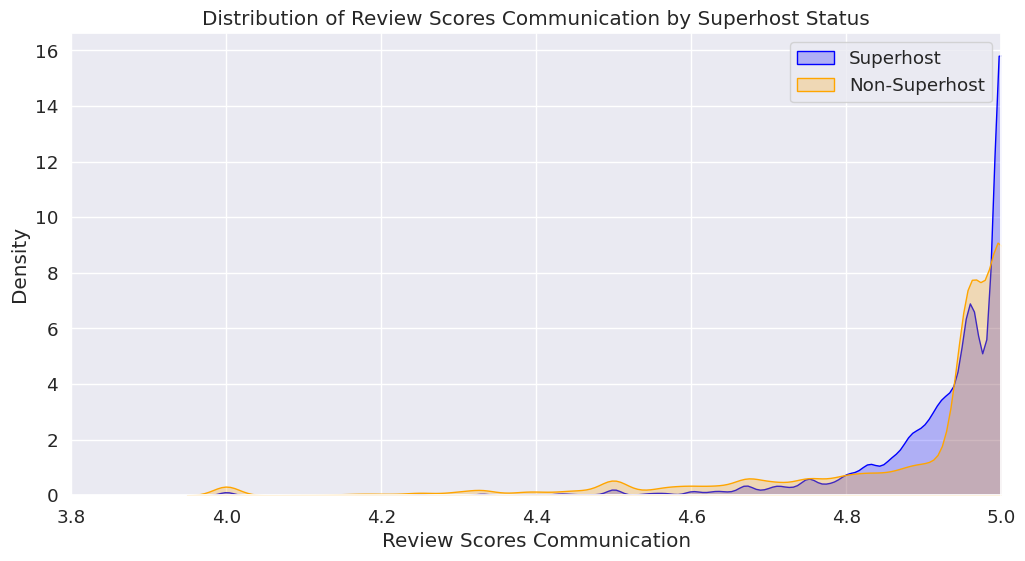

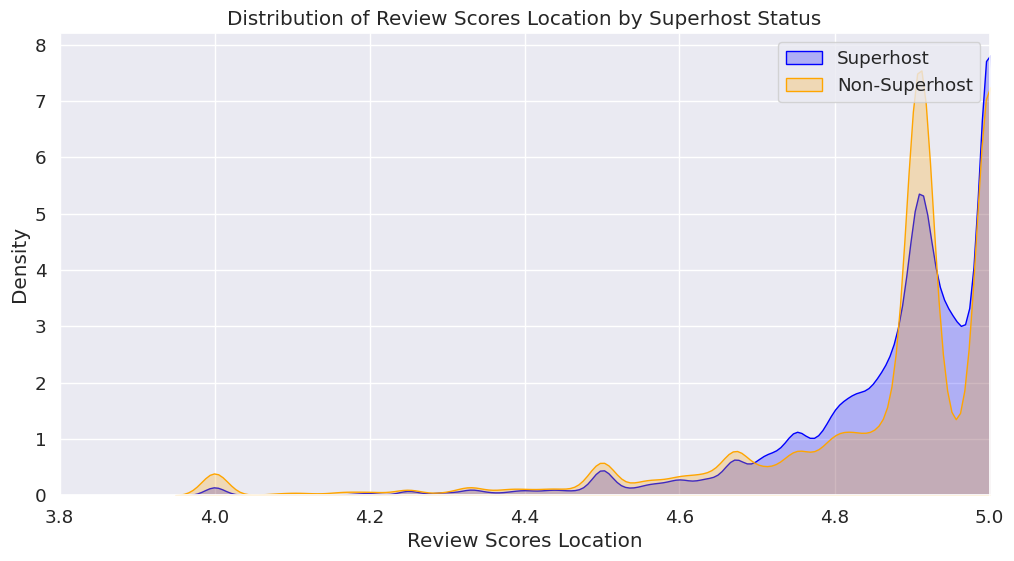

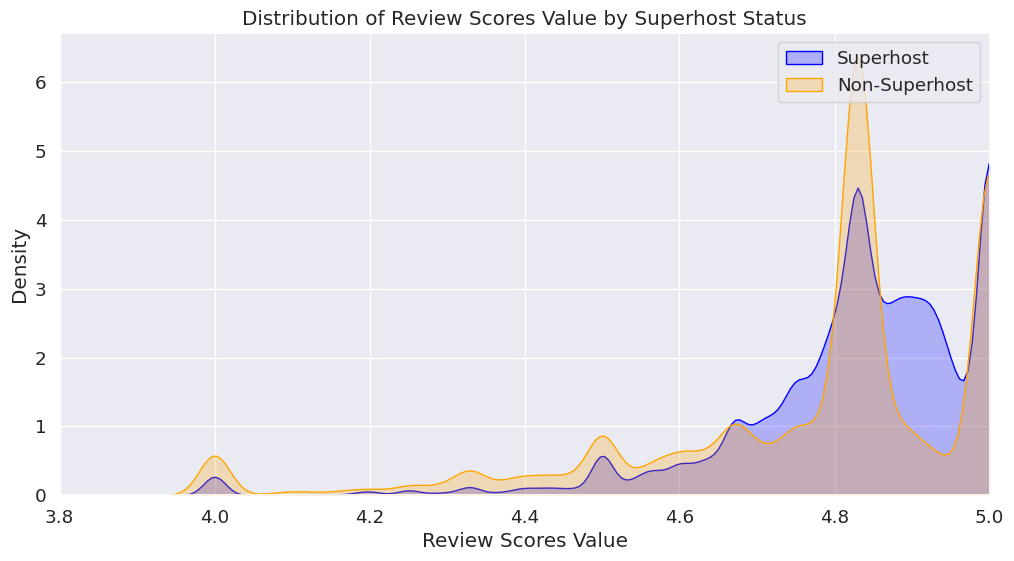

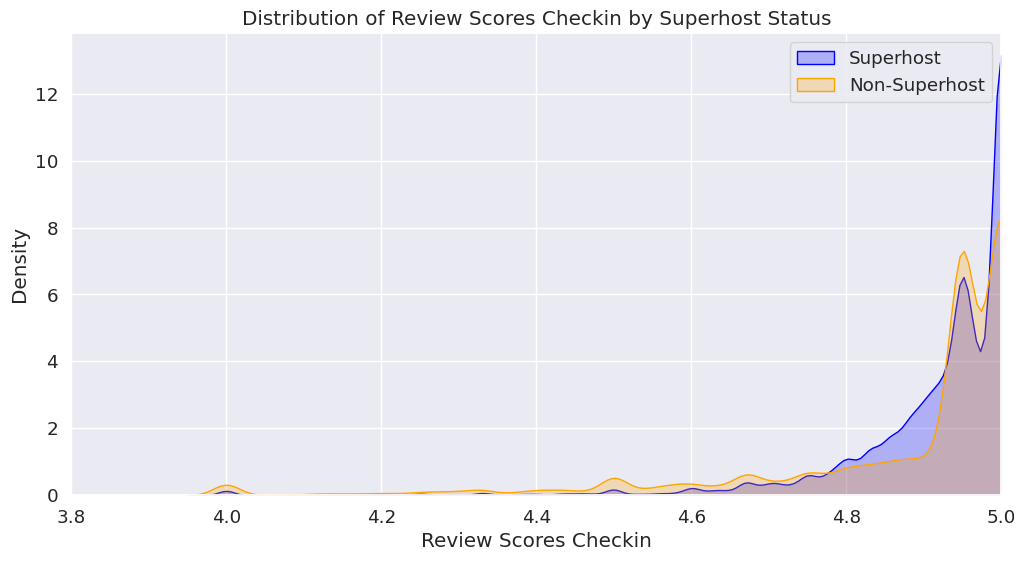

In [35]:
for col in review_columns:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=balanced_df[balanced_df['host_is_superhost'] == 't'], x=col, label='Superhost', shade=True, color='blue', bw_adjust=0.5)
    sns.kdeplot(data=balanced_df[balanced_df['host_is_superhost'] == 'f'], x=col, label='Non-Superhost', shade=True, color='orange', bw_adjust=0.5)
    plt.title(f'Distribution of {col.replace("_", " ").title()} by Superhost Status')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Density')
    plt.legend()
    plt.xlim(3.8, 5)  # Focus on the 4-5 range
    plt.show()

<div style="text-align: justify;">
The visualizations compare the distributions of review scores attributes between Superhosts and Non- Superhosts. Across all the attributes, superhosts generally exhibit higher densities at the upper end of the review scores (close to 5.0), better performance in terms of all review categories. While Non- Superhosts also have a high density near the maximum score, their distributions show slightly lower peaks compared to Superhosts, indicating a relatively less consistent performance. The findings emphasize the reliability and superior service quality typically associated with Superhosts.
</div>

###**7. CLUSTER ANALYSIS:**
<div style="text-align: justify;">Cluster analysis is a powerful unsupervised machine learning technique used to identify natural groupings within data based on shared characteristics. In this study, we employed K-Means clustering to segment Airbnb listings into distinct clusters based on their review scores. This approach allows us to uncover patterns and relationships between review ratings and listing characteristics, providing actionable insghts into which types of listings and host attributes consistently receive higher ratings.
</div>

In [36]:
import sqlite3
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

In [37]:
# Define the features you want to use for grouping players

df_select = df_no_outliers[review_columns].copy(deep=True)
df_select.head()

review_scores_rating  review_scores_cleanliness  \
0                  4.82                       4.70   
1                  4.83                       4.85   
2                  4.88                       4.89   
3                  5.00                       4.86   
4                  4.50                       4.00   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.96                    4.77                 4.81   
1                         4.96                    4.93                 4.85   
2                         4.96                    4.91                 4.83   
3                         4.71                    4.86                 5.00   
4                         5.00                    5.00                 4.00   

   review_scores_checkin  
0                   4.97  
1                   4.98  
2                   4.95  
3                   4.86  
4                   4.50

In [38]:
# Perform scaling on the dataframe containing the features
data = scale(df_select)

# Define number of clusters (3 in this case)
noOfClusters = 3

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [39]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.Series(model.labels_).value_counts(sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0     4951
1    14021
2     1741
Name: count, dtype: int64

In [40]:
# Extract cluster centers
cluster_centers = model.cluster_centers_

# Predict cluster labels for each data point
labels = model.labels_

In [41]:
# Analyse cluster centers

# Create a DataFrame with cluster centers and feature names
cluster_centers_df = pd.DataFrame(data=cluster_centers, columns=review_columns)

# Display the cluster centers
print(cluster_centers_df)

   review_scores_rating  review_scores_cleanliness  \
0             -0.513053                  -0.557128   
1              0.455928                   0.416639   
2             -2.206243                  -1.765874   

   review_scores_communication  review_scores_location  review_scores_value  \
0                    -0.286889               -0.537380            -0.590775   
1                     0.385517                0.357758             0.443673   
2                    -2.281997               -1.349115            -1.887547   

   review_scores_checkin  
0              -0.299887  
1               0.376860  
2              -2.175652  


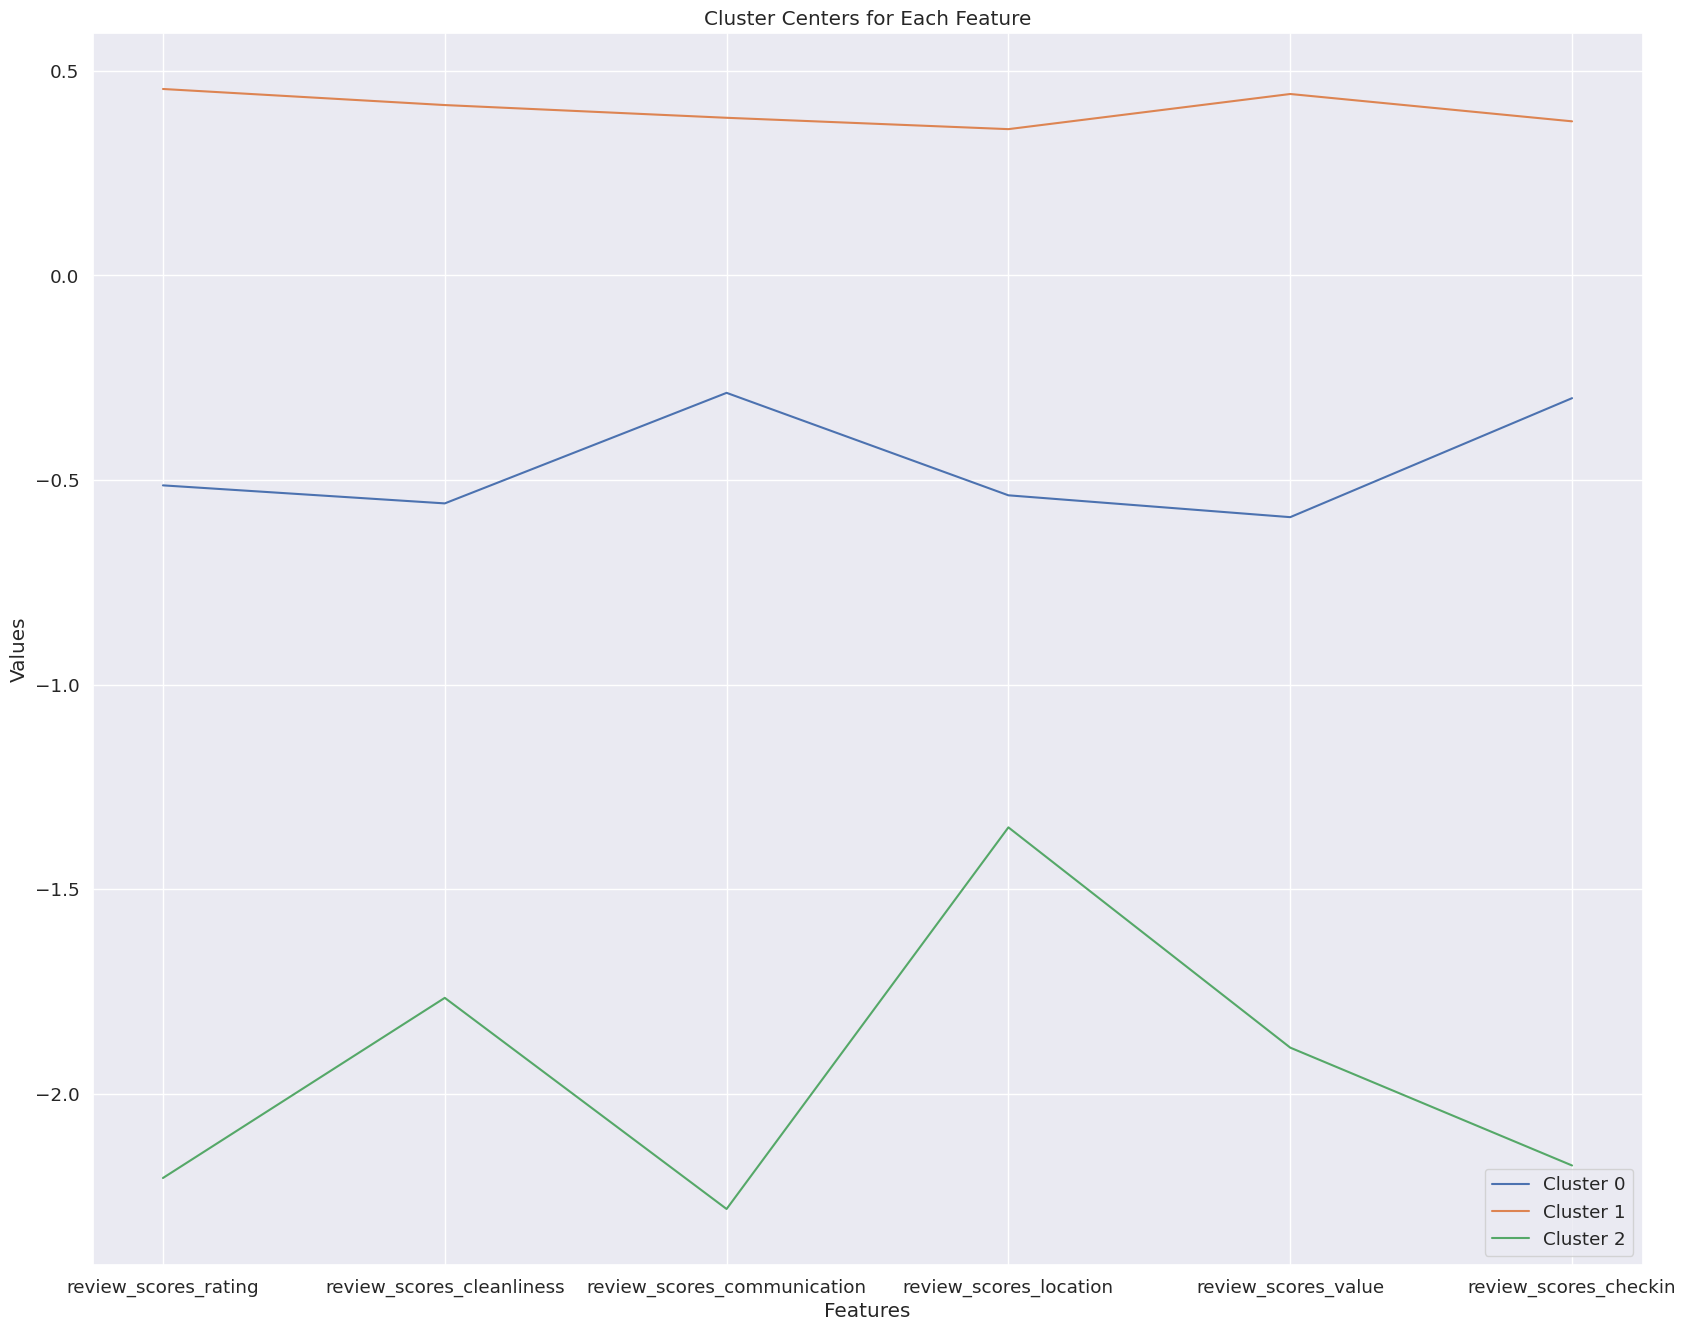

In [42]:
# Plot the cluster centers
plt.figure(figsize=(20, 16))
for i in range(noOfClusters):
    plt.plot(review_columns, cluster_centers[i], label=f'Cluster {i}')

plt.title('Cluster Centers for Each Feature')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.show()

<div style="text-align: justify;">
Cluster 1 stands out with the highest scores across all criteria, representing the top-performing listings. Cluster 0 has moderate scores but shows slightly lower ratings in cleanliness and check-in, suggesting these areas could be improved. Cluster 2 has the lowest scores, particularly in cleanliness, communication and check-in, indicating significant room for improvement. Overall, enhancing cleanliness and communication services, especially  in the lower performing clusters, can help boost overall ratings and guest satisfaction.
</div>

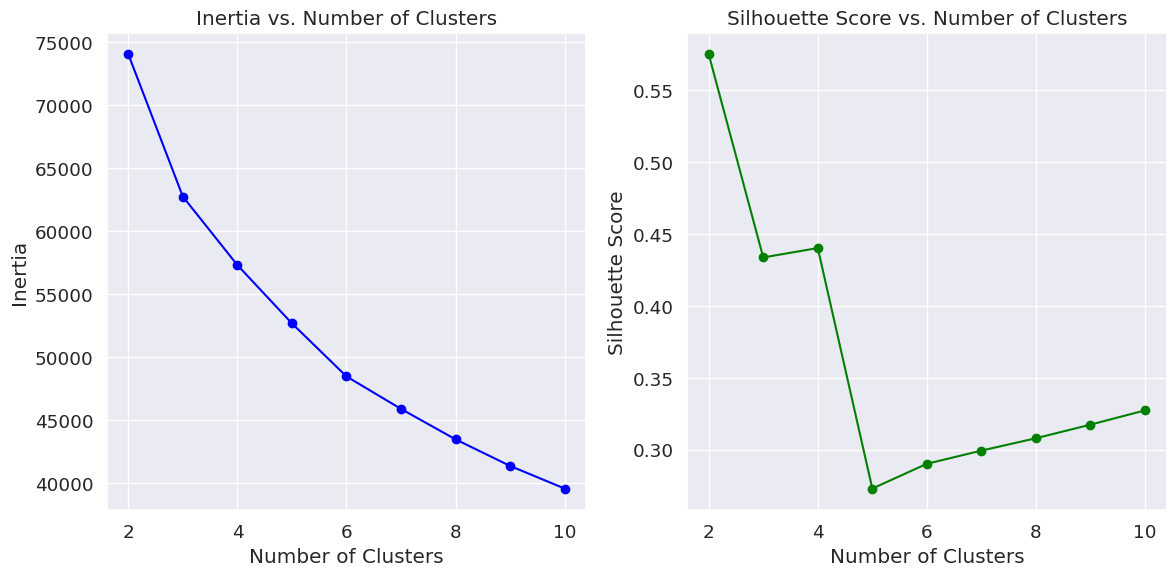

Inertia Scores: [74044.19956040627, 62756.36590480627, 57323.23241052566, 52698.902152844465, 48493.24077888766, 45916.35828891499, 43501.9027344978, 41394.64634131784, 39600.599142950865]
Silhouette Scores: [0.5751470393652068, 0.43372881291277443, 0.4402653490011903, 0.2728966084116615, 0.2901083567818591, 0.29929627799514646, 0.307888667549234, 0.31736835454812656, 0.32729479843899123]


In [43]:

# Define a range for the number of clusters
cluster_range = range(2, 11)
inertia_scores = []
silhouette_scores = []

# Calculate inertia and silhouette scores for each number of clusters
for k in cluster_range:
    model = KMeans(init='k-means++', n_clusters=k, n_init=20, random_state=42)
    model.fit(data)
    inertia_scores.append(model.inertia_)
    silhouette_scores.append(silhouette_score(data, model.labels_))

# Plot inertia and silhouette scores
plt.figure(figsize=(12, 6))

# Inertia
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_scores, marker='o', color='blue')
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Display scores
print("Inertia Scores:", inertia_scores)
print("Silhouette Scores:", silhouette_scores)

In [44]:
df_no_outliers['Cluster'] = labels

Property Type Distribution by Cluster:
property_category  Entire Place  Hotel Room     Other  Private Room  \
Cluster                                                               
0                      0.878004    0.006867  0.034740      0.079580   
1                      0.801369    0.010199  0.053848      0.132943   
2                      0.871338    0.012636  0.037335      0.078116   

property_category  Shared Room  Unique Stay  
Cluster                                      
0                     0.000202     0.000606  
1                          NaN     0.001640  
2                          NaN     0.000574  


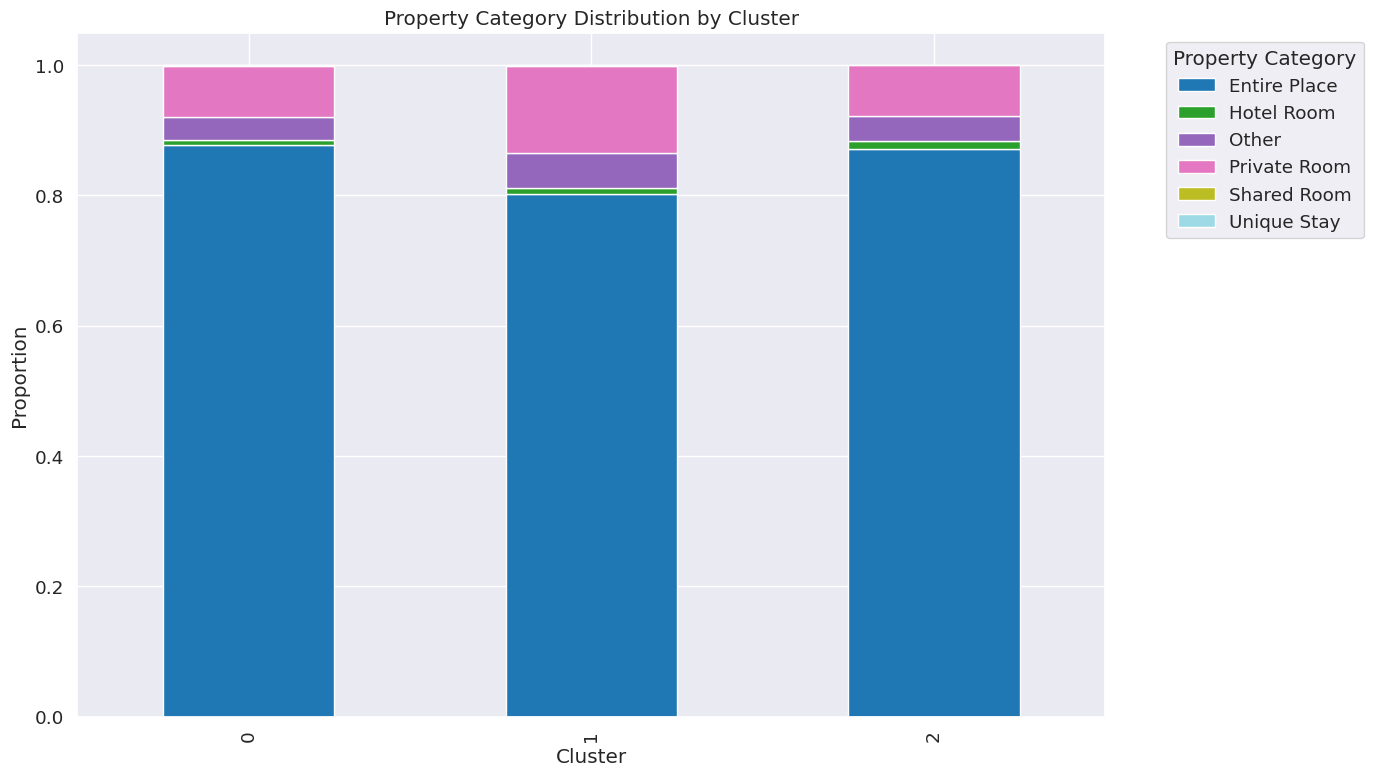

In [45]:
# Count the number of listings for each property type in each cluster
property_type_distribution = df_no_outliers.groupby('Cluster')['property_category'].value_counts(normalize=True).unstack()
print("Property Type Distribution by Cluster:")
print(property_type_distribution)

# Plot the distribution
property_type_distribution.plot(kind='bar', figsize=(14, 8), stacked=True, colormap='tab20')
plt.title('Property Category Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Property Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div style="text-align: justify;">
The property category distrbution shows that "Entire Place" dominates across all clusters, indicating that property type itself is not a major factor differentiating performance, The difference in review scores are likely influenced by service quality or host characteristics rather than the type of listing.
</div>

Mean Review Scores by Cluster:
         review_scores_rating  review_scores_cleanliness  \
Cluster                                                    
0                    4.724472                   4.720368   
1                    4.921942                   4.921423   
2                    4.379730                   4.470402   

         review_scores_communication  review_scores_location  \
Cluster                                                        
0                           4.847568                4.763294   
1                           4.964160                4.925940   
2                           4.502074                4.615319   

         review_scores_value  review_scores_checkin  
Cluster                                              
0                   4.664209               4.837015  
1                   4.882952               4.955753  
2                   4.389546               4.508863  


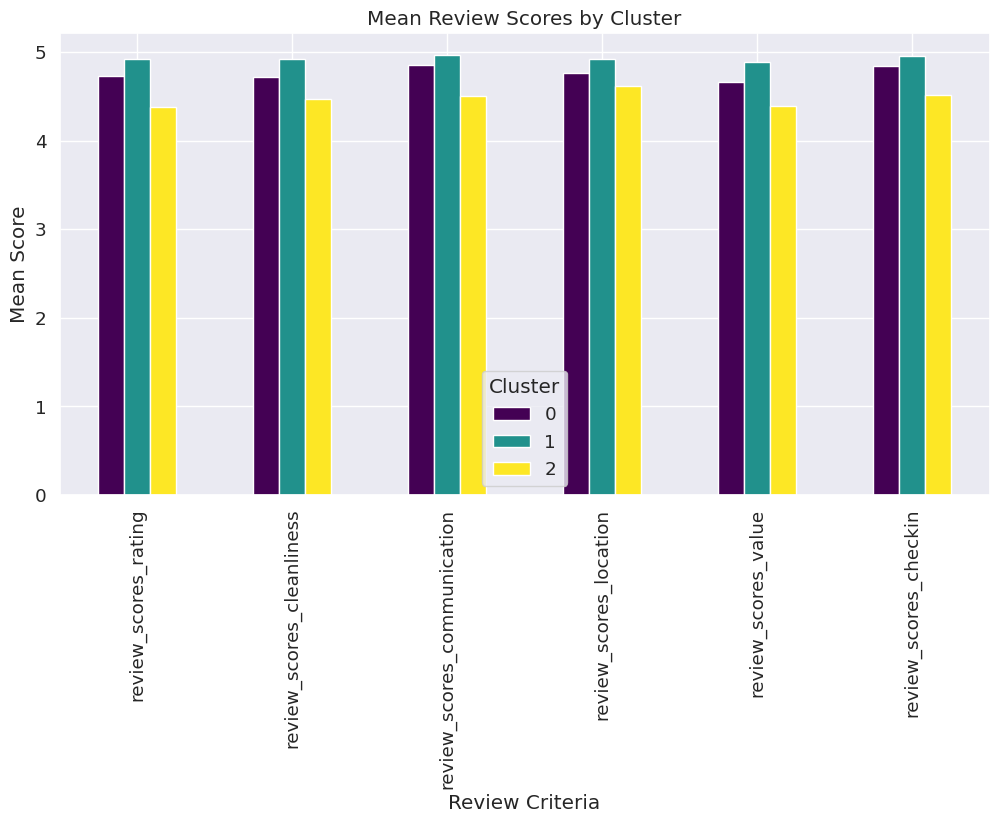

In [46]:
# Calculate mean review scores for each cluster
mean_review_scores = df_no_outliers.groupby('Cluster')[review_columns].mean()
print("Mean Review Scores by Cluster:")
print(mean_review_scores)

# Plot the results
mean_review_scores.T.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Mean Review Scores by Cluster')
plt.xlabel('Review Criteria')
plt.ylabel('Mean Score')
plt.legend(title='Cluster')
plt.show()

<div style="text-align: justify;">
Cluster 1 generally has the highest scores, indicating better performance, while Cluster 0 shows relatively lower scores.
review_scores_location is consistently high across all clusters, whereas
review_scores_cleanliness and review_scores_checkin show more variation. Overall, scores are mostly high (4-5).
</div>

Superhost Distribution by Cluster:
host_is_superhost         f         t
Cluster                              
0                  0.702686  0.297314
1                  0.661793  0.338207
2                  0.915566  0.084434


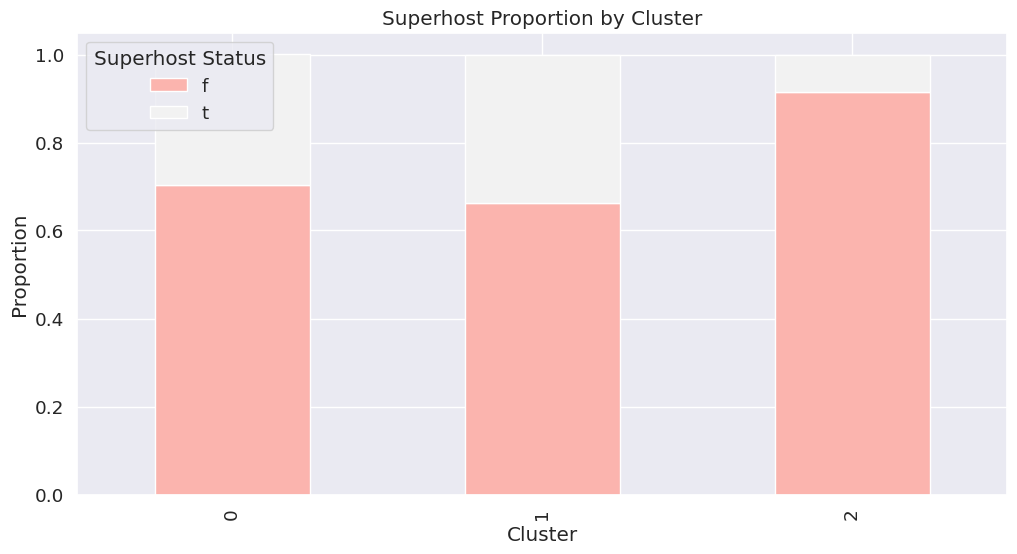

In [47]:
# Proportion of superhosts in each cluster
superhost_distribution = df_no_outliers.groupby('Cluster')['host_is_superhost'].value_counts(normalize=True).unstack()
print("Superhost Distribution by Cluster:")
print(superhost_distribution)

# Plot the distribution
superhost_distribution.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='Pastel1')
plt.title('Superhost Proportion by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Superhost Status')
plt.show()

<div style="text-align: justify;">
The Superhost proportion by cluster graphic demonstrates significant variability in superhost distribution across clusters. Cluster 1 has the highest proportion of superhosts, implying that listings in this cluster are more likely to be handled by experienced hosts who deliver high-quality service, resulting in better review scores. Cluster 0 contains a moderate proportion of superhosts, indicating a mix of performance levels. Cluster 2, on the other hand, has the lowest proportion of superhosts, which could explain its lower review rankings, as these hosts may lack the experience or service quality that superhosts provide. This demonstrates the significance of superhost position in sustaining high ratings and visitor happiness.
</div>

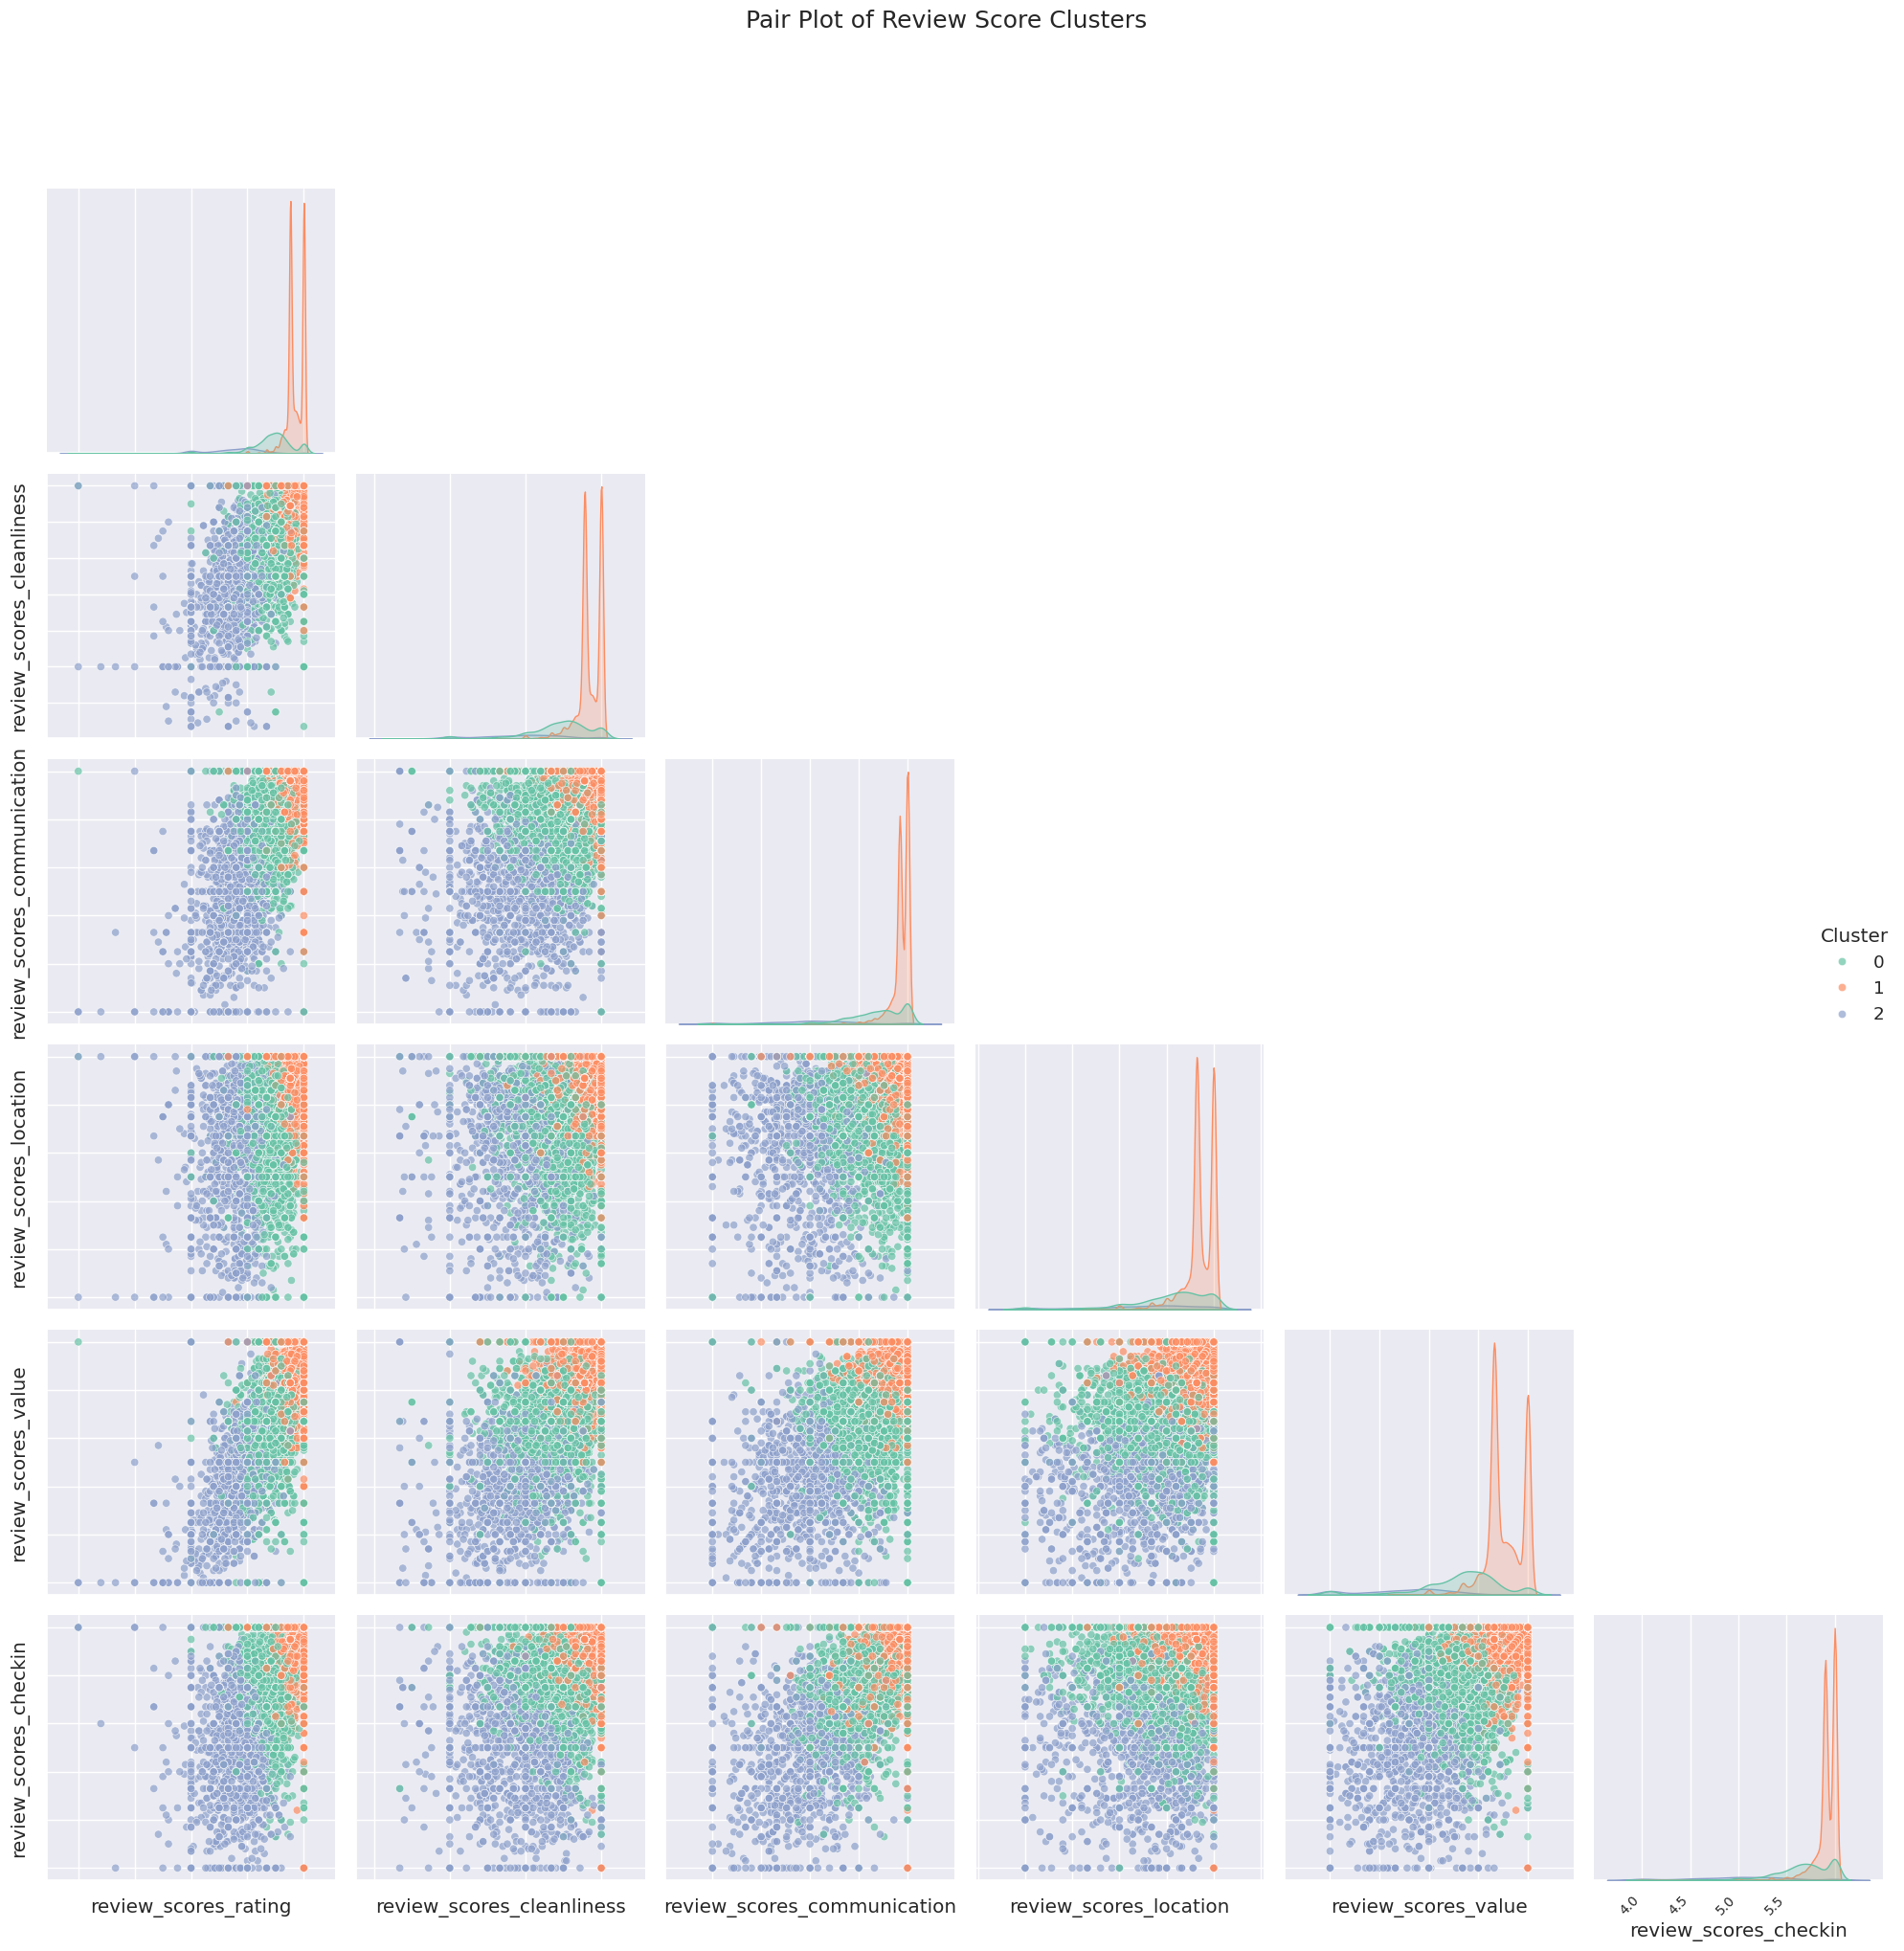

In [48]:
pairplot=sns.pairplot(df_no_outliers, vars=review_columns, hue='Cluster', palette='Set2', corner=True, plot_kws={'alpha': 0.7})
# Significantly increase figure size for better clarity
pairplot.fig.set_size_inches(20, 20)

# Further adjust the spacing between subplots
pairplot.fig.subplots_adjust(top=0.95, wspace=0.5, hspace=0.5)

# Add a title for the overall figure
pairplot.fig.suptitle('Pair Plot of Review Score Clusters', y=1.02, fontsize=18)

# Rotate labels and adjust font size for better readability
for ax in pairplot.axes.flatten():
    if ax is not None:  # Some axes may not exist due to corner=True
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
        ax.tick_params(axis='x', labelsize=10)  # Ensure x-axis labels are visible
        ax.tick_params(axis='y', labelsize=10)  # Ensure y-axis labels are visible

# Use tight layout to avoid label truncation
pairplot.fig.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

<div style="text-align: justify;">
The pair plot shows distinct clusters of review scores, with Cluster 0 representing high-performing listings that consistently score well across all criteria (cleanliness, communication, value etc.). Clusters 1 and 2 have more variability, indicating mixed or average performance. Strong correlations between features suggest that improving one aspect (eg, cleanliness) positively impacts others.
</div>

#**Step 4: Research Questions**

##**1. What factors indluence the pricing of  Airbnb listings in Cape Town?**
<div style="text-align: justify;">

**Variables to Analyze:** price, room_type, property_type, accommodates, number_of_reviews, review_scores_rating, neighbourhood_cleansed, bedrooms, bathrooms, and availability_365.

**Analysis Type:** This question could be explored using correlation analysis and multiple visualizations

**1. Heat Map** for correlation between numerical features (eg. price vs accomodates, bedrooms etc).

**2. Box Plots** to observe pricing variations across different property types or room types.

**3. Geospatial Mapping** to see neighborhood wise price distributions.
</div>




##**2. What are the key factors associated with high review scores for Airbnb listings in Cape Town?**
<div style="text-align: justify;">


**Variables to Analyze:** review_scores_rating, review_scores_cleanliness, review_scores_communication, review_scores_location, review_scores_value, review_scores_checkin, number_of_reviews, host_is_superhost, room_type, property_type.

**Analysis Type:** Correlation analysis, followed by clustering and comparative visualizations.
1. **Cluster Analysis** to group different type of listings based on review scores.
2. **Violin Plots** to compare distributions of review scores across room type and property type.
3. **Density Charts** to show review scores by host factors (host_is_superhost).
</div>



## **3. How does the availability of the Airbnb listings vary across neighbourhood and room types in Cape Town?**
<div style="text-align: justify;">

**Variables to Analyze:** availability_30, availability_60, availability_90, availability_365, room_type and neighbourhood_cleansed.

**Analysis Type:** Trend Analysis which reveals how listing availability varies depending on property type or location.

1. **Bar Plot** to calculate the average availability for each room_type.
2. **Line Plot** which reveals location-specific availability trends, helping to identify neighborhoods with a higher prevalence of consistently available listings.
</div>

# **Findings and Conclusion**
<div style="text-align: justify;">
Pricing patterns exhibited a right-skewed distribution, with most listings priced under $2000, while luxury properties and outliers suggested the influence of premium locations or unique amenities.

Availability analysis uncovered distinct hosting strategies, with bimodal trends in short-term and year-round availabilities, influenced by seasonal demand or part- time hosting. Review scores hightlighted the importance of cleanliness, communication and check-in experiences, with superhosts consistently outperforming non-superhosts across all metrics, reflecting their superior service quality.

Geospatial analysis showed notable price variations across neighborhoods, indicating location-based desirability and its impact on guest satisfaction.
Cluster analysis further categorized listings into perforamnce tiers, demonstrating that high-performing clusters were dominated by superhosts and premium accomodations.

To build on these findings, further research could involve predictive modeling to better understand the drivers of pricing and review scores, seasonality analysis to explore fluctuations in demand and segmentation of guests based on preferences.
Additionally, deeper geospatial analysis could uncover untapped high-potential areas for new listings, while studying host behavior could provide actionable strategies for enhancing guest experiences.

These insights collectively pave the way for more strategic decision-making, maximizing profitability for hosts and improving overall customer satisfaction.

</div>

#**References**

*   VanderPlas, J. (2022) Python Data Science Handbook, 2nd Edition [Book], www.oreilly.com. O’Reilly Media, Inc. Available at: https://learning.oreilly.com/library/view/python-data-science/9781098121211/.
*   Cape Town (2024) Insideairbnb.com. Available at: https://insideairbnb.com/cape-town/.


